Name Mansi Nagpal
Email:- Mansinagpal786@gmail.com

Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



###### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In this dataset I've to Predict the 'how much rainfall could be there' and 'whether or not it will rain tomorrow both. Since 'rainfall' is in the form of continuous number hence will use Regression model and 'rain tomorrow' is in the form of categorical String format so will use classification model as well.Ergo, first will build a regression model to predict the 'rainfall' and later in this notebook itself will build a classification model to predict 'whether or not it will rain tomorrow ' as well.

#### Regression Model Building

EDA

In [3]:
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])
print('Shape is',df.shape)

Row"s are 8425
Columns are 23
Shape is (8425, 23)


In [4]:
df.ndim

2

In [5]:
df.size

193775

In [6]:
df.index

RangeIndex(start=0, stop=8425, step=1)

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df_numeric=df.select_dtypes(exclude='object')
df_numeric

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        13.4     22.9       0.6          NaN       NaN           44.0   
1         7.4     25.1       0.0          NaN       NaN           44.0   
2        12.9     25.7       0.0          NaN       NaN           46.0   
3         9.2     28.0       0.0          NaN       NaN           24.0   
4        17.5     32.3       1.0          NaN       NaN           41.0   
...       ...      ...       ...          ...       ...            ...   
8420      2.8     23.4       0.0          NaN       NaN           31.0   
8421      3.6     25.3       0.0          NaN       NaN           22.0   
8422      5.4     26.9       0.0          NaN       NaN           37.0   
8423      7.8     27.0       0.0          NaN       NaN           28.0   
8424     14.9      NaN       0.0          NaN       NaN            NaN   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0             20.0          24.0         71.0         22.0       1007.7   
1              4.0          22.0         44.0         25.0       1010.6   
2             19.0          26.0         38.0         30.0       1007.6   
3             11.0           9.0         45.0         16.0       1017.6   
4              7.0          20.0         82.0         33.0       1010.8   
...            ...           ...          ...          ...          ...   
8420          13.0          11.0         51.0         24.0       1024.6   
8421          13.0           9.0         56.0         21.0       1023.5   
8422           9.0           9.0         53.0         24.0       1021.0   
8423          13.0           7.0         51.0         24.0       1019.4   
8424          17.0          17.0         62.0         36.0       1020.2   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0          1007.1       8.0       NaN     16.9     21.8  
1          1007.8       NaN       NaN     17.2     24.3  
2          1008.7       NaN       2.0     21.0     23.2  
3          1012.8       NaN       NaN     18.1     26.5  
4          1006.0       7.0       8.0     17.8     29.7  
...           ...       ...       ...      ...      ...  
8420       1020.3       NaN       NaN     10.1     22.4  
8421       1019.1       NaN       NaN     10.9     24.5  
8422       1016.8       NaN       NaN     12.5     26.1  
8423       1016.5       3.0       2.0     15.1     26.0  
8424       1017.9       8.0       8.0     15.0     20.9  

[8425 rows x 16 columns]

In [9]:
#categorical Dataframe
df_categorical=df.select_dtypes(include='object')
df_categorical

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0     2008-12-01   Albury           W          W        WNW        No   
1     2008-12-02   Albury         WNW        NNW        WSW        No   
2     2008-12-03   Albury         WSW          W        WSW        No   
3     2008-12-04   Albury          NE         SE          E        No   
4     2008-12-05   Albury           W        ENE         NW        No   
...          ...      ...         ...        ...        ...       ...   
8420  2017-06-21    Uluru           E         SE        ENE        No   
8421  2017-06-22    Uluru         NNW         SE          N        No   
8422  2017-06-23    Uluru           N         SE        WNW        No   
8423  2017-06-24    Uluru          SE        SSE          N        No   
8424  2017-06-25    Uluru         NaN        ESE        ESE        No   

     RainTomorrow  
0              No  
1              No  
2              No  
3              No  
4              No  
...           ...  
8420           No  
8421           No  
8422           No  
8423           No  
8424          NaN  

[8425 rows x 7 columns]

In [10]:
from sklearn.compose import make_column_selector as selector

In [11]:
numeric_columns=selector(dtype_exclude=object)(df)
print(numeric_columns)
print('\n Total numeric columns are ',len(numeric_columns))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

 Total numeric columns are  16


In [12]:
categorical_columns=selector(dtype_include=object)(df)
print(categorical_columns)
print('\n Total string categorical columns are ',len(categorical_columns))

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

 Total string categorical columns are  7


In [13]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [15]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [16]:
df.isnull().sum().sum()

19472

Null values are present in almost each columns and the null value counts as 19472,which is on higher side hence will replace it with mean or mode depending on the characteristics of the columns.

In [17]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

#### Data Visualization
1.countplot

The Value Counts for the attribute "Location" is
 Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

The Countplot Diagram for the attribute "Location" is
 AxesSubplot(0.125,0.125;0.775x0.755)


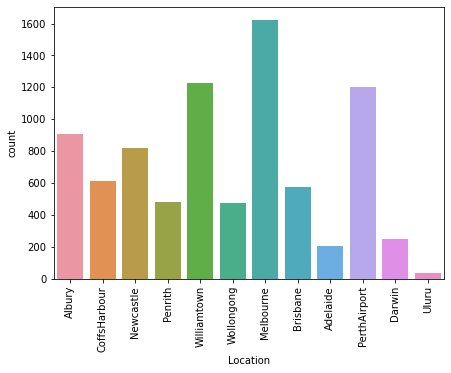



The Value Counts for the attribute "WindGustDir" is
 N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

The Countplot Diagram for the attribute "WindGustDir" is
 AxesSubplot(0.125,0.125;0.775x0.755)


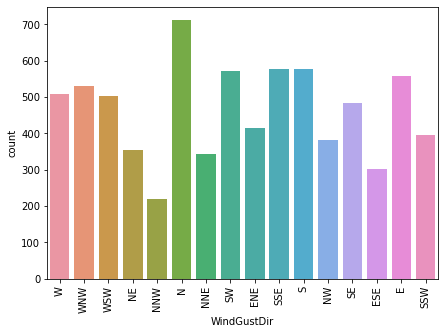



The Value Counts for the attribute "WindGustSpeed" is
 39.0     441
35.0     435
37.0     422
33.0     408
31.0     396
41.0     371
30.0     367
28.0     332
43.0     302
48.0     292
26.0     275
50.0     259
46.0     258
24.0     255
52.0     249
44.0     241
22.0     223
54.0     210
20.0     186
56.0     153
57.0     148
19.0     137
61.0     114
59.0     113
63.0      95
17.0      92
65.0      74
67.0      64
72.0      62
15.0      58
13.0      57
74.0      54
70.0      53
69.0      49
76.0      44
78.0      23
80.0      22
11.0      18
85.0      14
81.0      13
91.0      12
93.0       7
89.0       7
83.0       6
9.0        6
98.0       4
94.0       3
87.0       3
7.0        2
102.0      2
100.0      2
107.0      1
Name: WindGustSpeed, dtype: int64

The Countplot Diagram for the attribute "WindGustSpeed" is
 AxesSubplot(0.125,0.125;0.775x0.755)


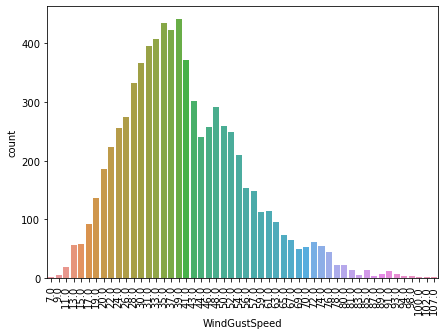



The Value Counts for the attribute "WindDir9am" is
 N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

The Countplot Diagram for the attribute "WindDir9am" is
 AxesSubplot(0.125,0.125;0.775x0.755)


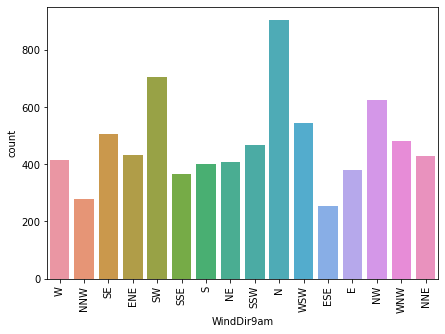



The Value Counts for the attribute "WindDir3pm" is
 SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

The Countplot Diagram for the attribute "WindDir3pm" is
 AxesSubplot(0.125,0.125;0.775x0.755)


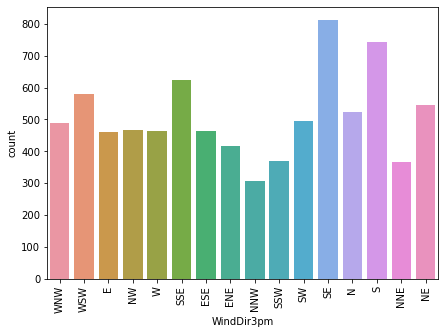



The Value Counts for the attribute "WindSpeed9am" is
 9.0     803
0.0     752
13.0    708
4.0     610
11.0    607
7.0     572
6.0     515
17.0    481
15.0    467
19.0    430
20.0    427
24.0    312
22.0    279
2.0     258
28.0    229
26.0    208
31.0    153
30.0    114
35.0     77
33.0     70
37.0     58
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2
Name: WindSpeed9am, dtype: int64

The Countplot Diagram for the attribute "WindSpeed9am" is
 AxesSubplot(0.125,0.125;0.775x0.755)


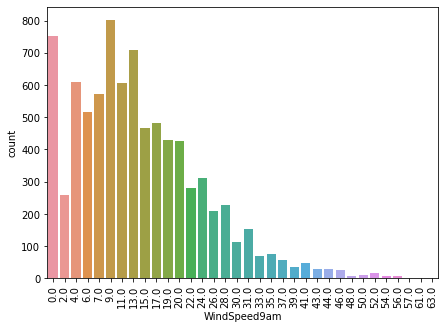



The Value Counts for the attribute "WindSpeed3pm" is
 9.0     724
19.0    639
13.0    599
20.0    594
17.0    555
11.0    534
15.0    524
24.0    511
28.0    458
22.0    457
26.0    378
7.0     331
4.0     287
30.0    279
31.0    266
6.0     240
0.0     199
33.0    170
35.0    137
37.0    125
39.0     80
2.0      58
41.0     45
43.0     34
46.0     29
44.0     18
50.0     12
48.0     11
52.0      9
56.0      7
54.0      2
61.0      2
57.0      2
65.0      1
83.0      1
Name: WindSpeed3pm, dtype: int64

The Countplot Diagram for the attribute "WindSpeed3pm" is
 AxesSubplot(0.125,0.125;0.775x0.755)


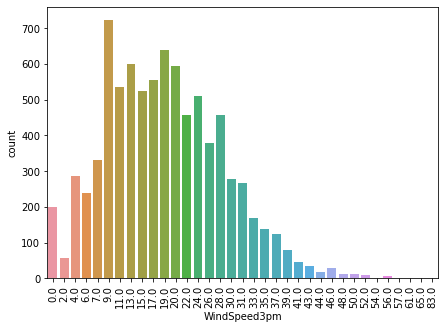



The Value Counts for the attribute "Humidity9am" is
 73.0    205
62.0    202
68.0    199
74.0    195
70.0    188
       ... 
17.0      2
14.0      2
11.0      2
10.0      1
15.0      1
Name: Humidity9am, Length: 90, dtype: int64

The Countplot Diagram for the attribute "Humidity9am" is
 AxesSubplot(0.125,0.125;0.775x0.755)


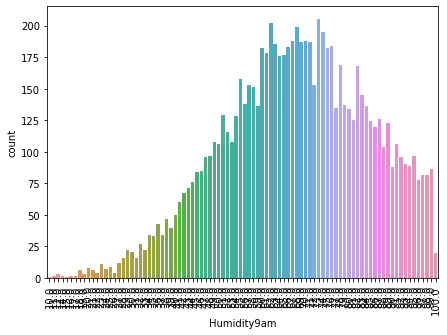



The Value Counts for the attribute "Humidity3pm" is
 55.0    195
48.0    194
51.0    194
46.0    193
54.0    193
       ... 
8.0      11
7.0       9
98.0      7
99.0      3
6.0       3
Name: Humidity3pm, Length: 94, dtype: int64

The Countplot Diagram for the attribute "Humidity3pm" is
 AxesSubplot(0.125,0.125;0.775x0.755)


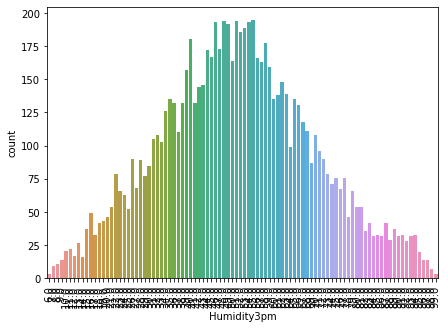



The Value Counts for the attribute "Cloud9am" is
 7.0    1418
1.0    1038
8.0    1015
0.0     554
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273
Name: Cloud9am, dtype: int64

The Countplot Diagram for the attribute "Cloud9am" is
 AxesSubplot(0.125,0.125;0.775x0.755)


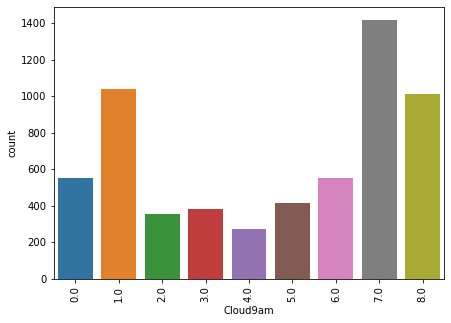



The Value Counts for the attribute "Cloud3pm" is
 7.0    1294
1.0    1077
8.0     863
6.0     597
5.0     522
2.0     508
3.0     411
4.0     351
0.0     347
Name: Cloud3pm, dtype: int64

The Countplot Diagram for the attribute "Cloud3pm" is
 AxesSubplot(0.125,0.125;0.775x0.755)


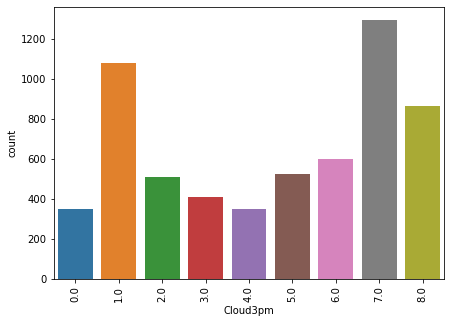



The Value Counts for the attribute "RainToday" is
 No     6195
Yes    1990
Name: RainToday, dtype: int64

The Countplot Diagram for the attribute "RainToday" is
 AxesSubplot(0.125,0.125;0.775x0.755)


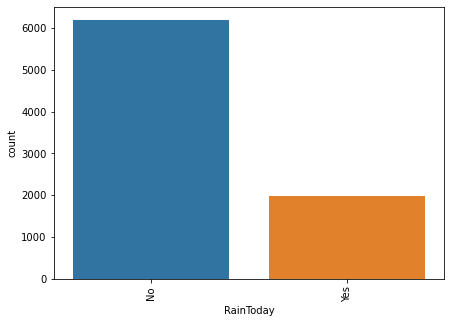



The Value Counts for the attribute "RainTomorrow" is
 No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

The Countplot Diagram for the attribute "RainTomorrow" is
 AxesSubplot(0.125,0.125;0.775x0.755)


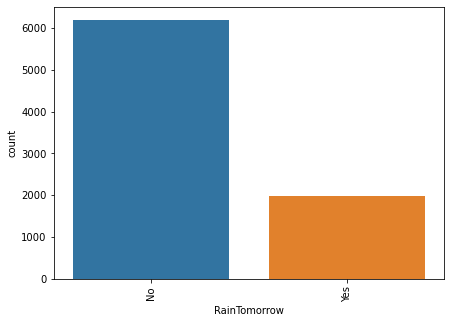

In [18]:
for i in df.columns.drop(['Date','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','Pressure9am','Pressure3pm','Temp9am','Temp3pm']):
    print(f'The Value Counts for the attribute "{i}" is\n {df[i].value_counts()}')
    plt.figure(figsize=(7,5))
    print(f'\nThe Countplot Diagram for the attribute "{i}" is\n {sns.countplot(df[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

Histogram Plot


The Histogram Diagram for the attribute "Location" is
 AxesSubplot(0.125,0.125;0.775x0.755)


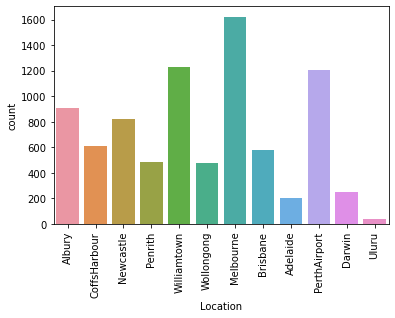




The Histogram Diagram for the attribute "WindGustDir" is
 AxesSubplot(0.125,0.125;0.775x0.755)


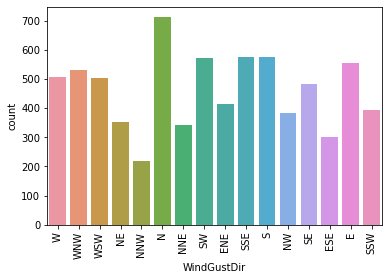




The Histogram Diagram for the attribute "WindGustSpeed" is
 AxesSubplot(0.125,0.125;0.775x0.755)


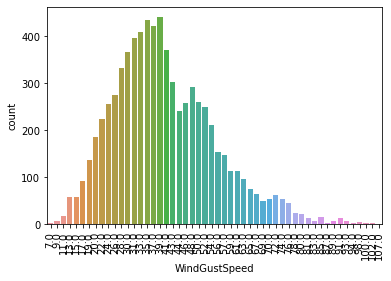




The Histogram Diagram for the attribute "WindDir9am" is
 AxesSubplot(0.125,0.125;0.775x0.755)


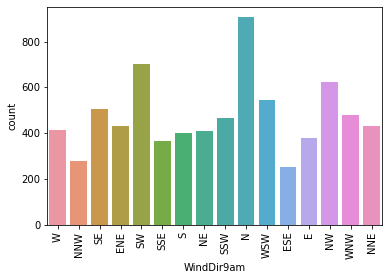




The Histogram Diagram for the attribute "WindDir3pm" is
 AxesSubplot(0.125,0.125;0.775x0.755)


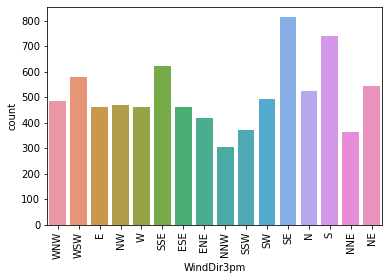




The Histogram Diagram for the attribute "WindSpeed9am" is
 AxesSubplot(0.125,0.125;0.775x0.755)


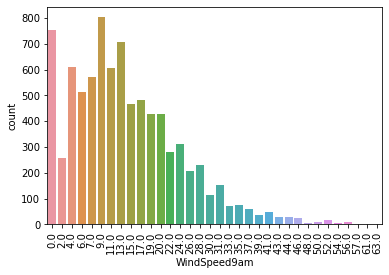




The Histogram Diagram for the attribute "WindSpeed3pm" is
 AxesSubplot(0.125,0.125;0.775x0.755)


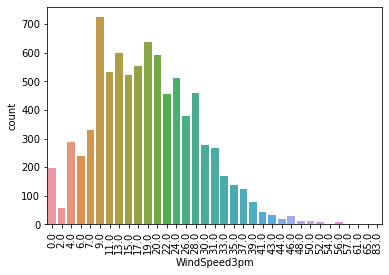




The Histogram Diagram for the attribute "Humidity9am" is
 AxesSubplot(0.125,0.125;0.775x0.755)


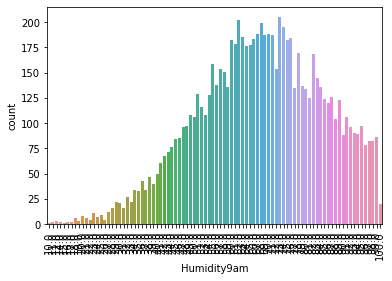




The Histogram Diagram for the attribute "Humidity3pm" is
 AxesSubplot(0.125,0.125;0.775x0.755)


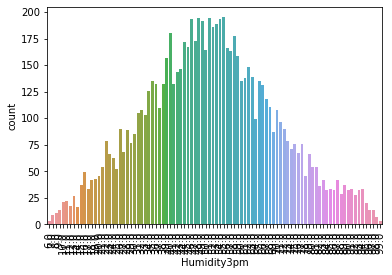




The Histogram Diagram for the attribute "Cloud9am" is
 AxesSubplot(0.125,0.125;0.775x0.755)


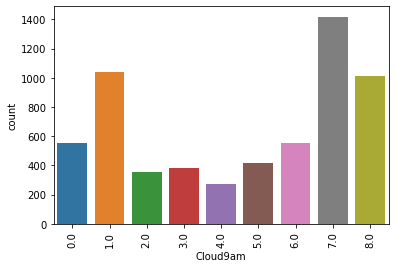




The Histogram Diagram for the attribute "Cloud3pm" is
 AxesSubplot(0.125,0.125;0.775x0.755)


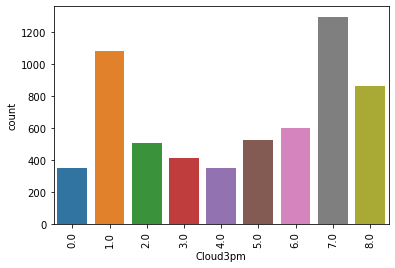




The Histogram Diagram for the attribute "RainToday" is
 AxesSubplot(0.125,0.125;0.775x0.755)


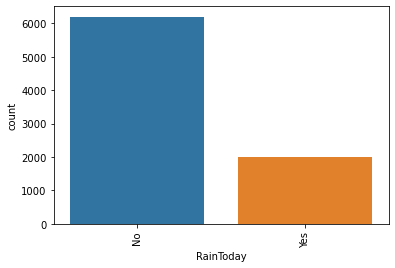




The Histogram Diagram for the attribute "RainTomorrow" is
 AxesSubplot(0.125,0.125;0.775x0.755)


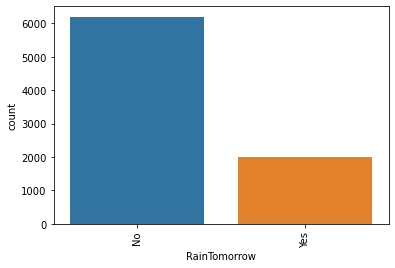

In [19]:
for i in df.columns.drop(['Date','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','Pressure9am','Pressure3pm','Temp9am','Temp3pm']):
    print(f'\nThe Histogram Diagram for the attribute "{i}" is\n {sns.countplot(df[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

Scatter  Plot

The Scatter Plot for the attribute "Rainfall" & "Location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


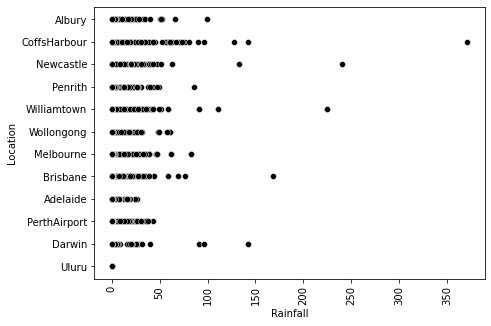



The Scatter Plot for the attribute "Rainfall" & "WindGustDir" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


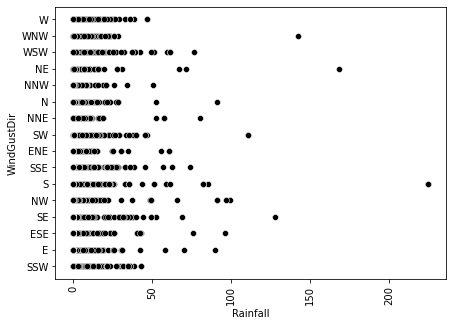



The Scatter Plot for the attribute "Rainfall" & "WindGustSpeed" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


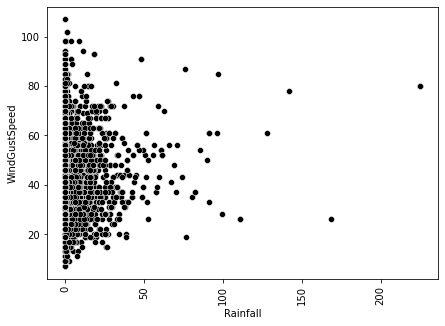



The Scatter Plot for the attribute "Rainfall" & "WindDir9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


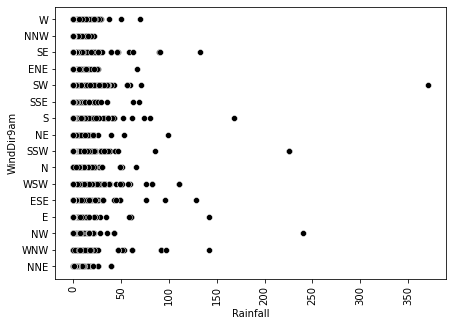



The Scatter Plot for the attribute "Rainfall" & "WindDir3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


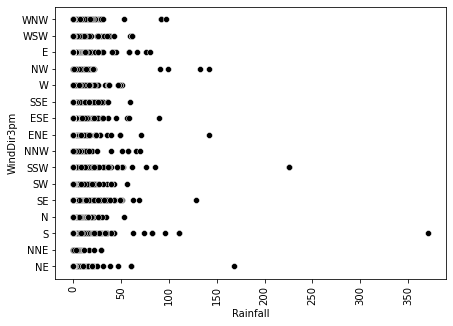



The Scatter Plot for the attribute "Rainfall" & "WindSpeed9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


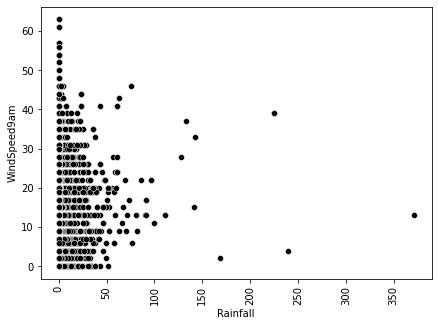



The Scatter Plot for the attribute "Rainfall" & "WindSpeed3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


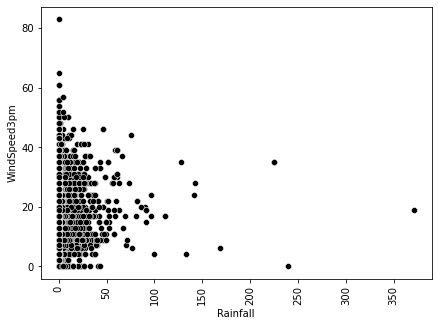



The Scatter Plot for the attribute "Rainfall" & "Humidity9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


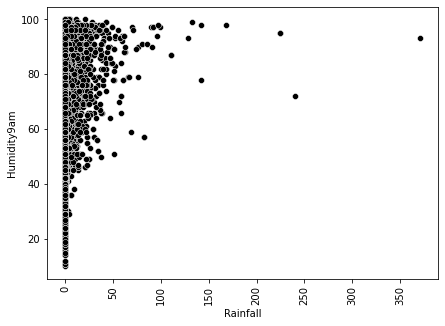



The Scatter Plot for the attribute "Rainfall" & "Humidity3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


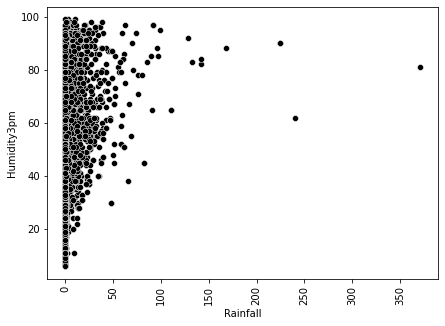



The Scatter Plot for the attribute "Rainfall" & "Cloud9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


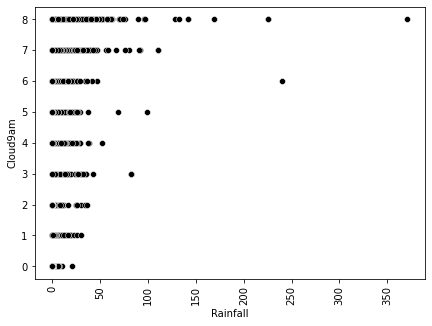



The Scatter Plot for the attribute "Rainfall" & "Cloud3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


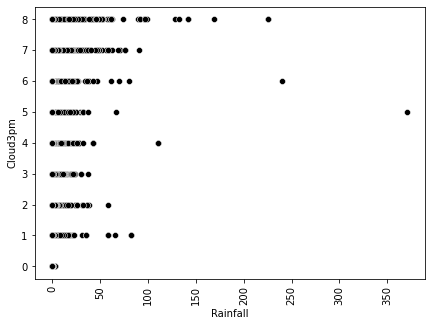



The Scatter Plot for the attribute "Rainfall" & "RainToday" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


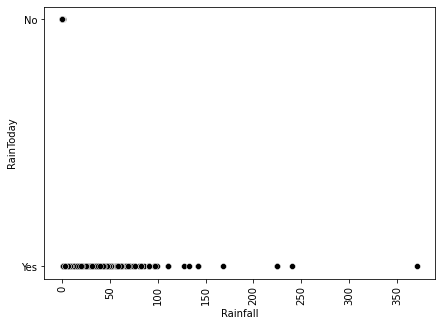



The Scatter Plot for the attribute "Rainfall" & "RainTomorrow" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


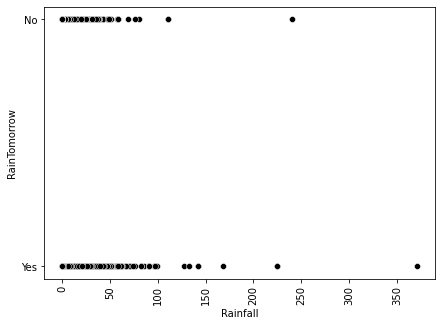

In [20]:
for i in df.columns.drop(['Date','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','Pressure9am','Pressure3pm','Temp9am','Temp3pm']):
    plt.figure(figsize=(7,5))
    print(f'The Scatter Plot for the attribute "Rainfall" & "{i}" is-\n {sns.scatterplot(df["Rainfall"],df[i],color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### Scatter (x-axis = Rain next day)

The Scatter Plot for the attribute "RainTomorrow" & "Location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


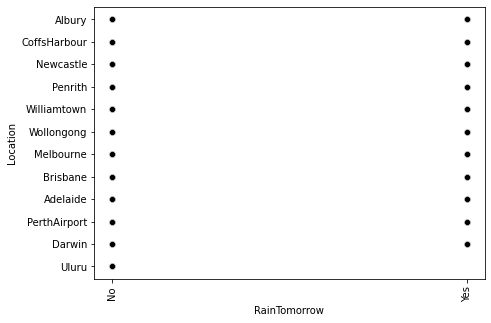



The Scatter Plot for the attribute "RainTomorrow" & "WindGustDir" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


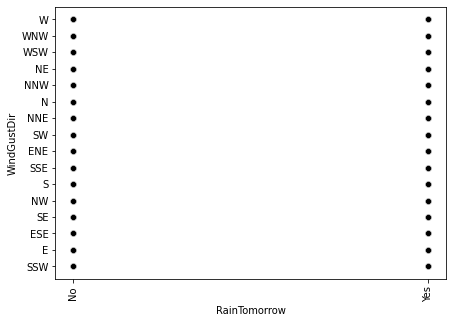



The Scatter Plot for the attribute "RainTomorrow" & "WindGustSpeed" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


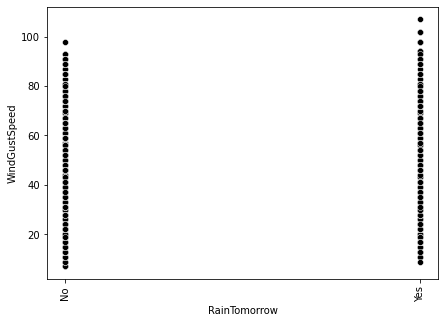



The Scatter Plot for the attribute "RainTomorrow" & "WindDir9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


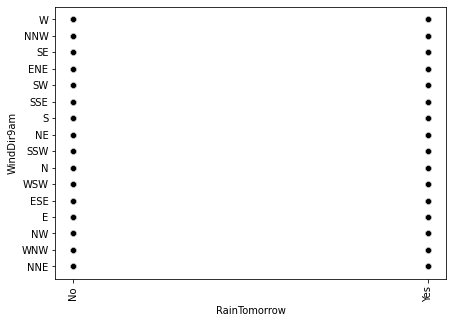



The Scatter Plot for the attribute "RainTomorrow" & "WindDir3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


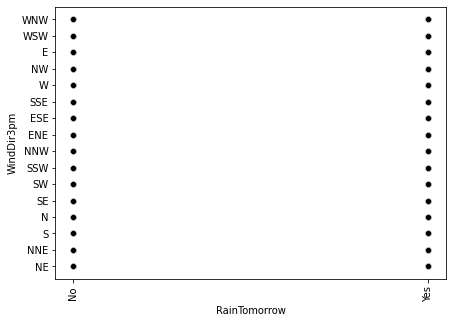



The Scatter Plot for the attribute "RainTomorrow" & "WindSpeed9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


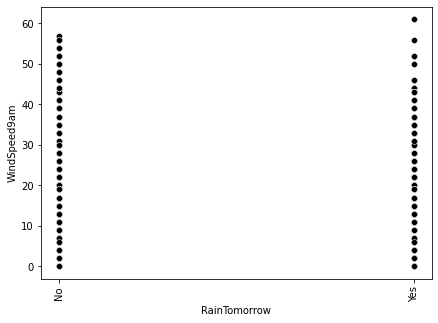



The Scatter Plot for the attribute "RainTomorrow" & "WindSpeed3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


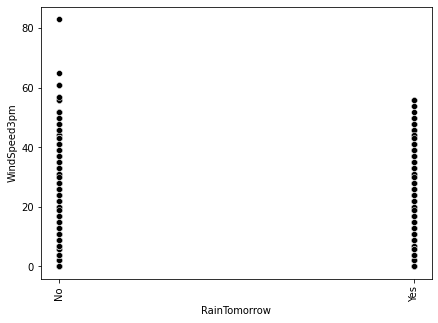



The Scatter Plot for the attribute "RainTomorrow" & "Humidity9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


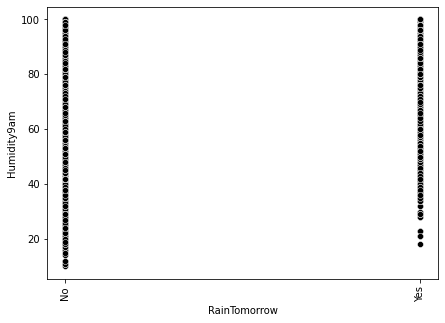



The Scatter Plot for the attribute "RainTomorrow" & "Humidity3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


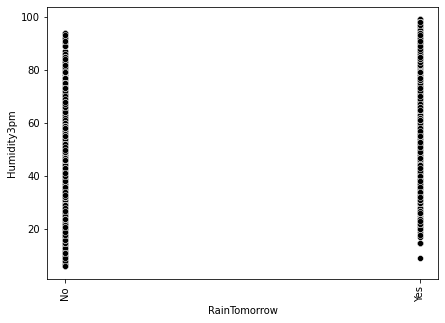



The Scatter Plot for the attribute "RainTomorrow" & "Cloud9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


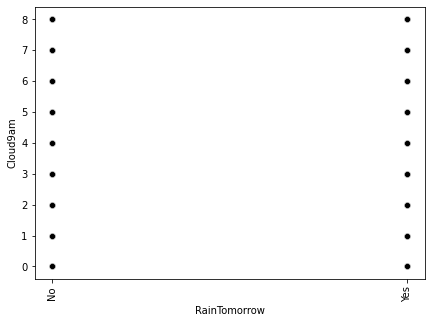



The Scatter Plot for the attribute "RainTomorrow" & "Cloud3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


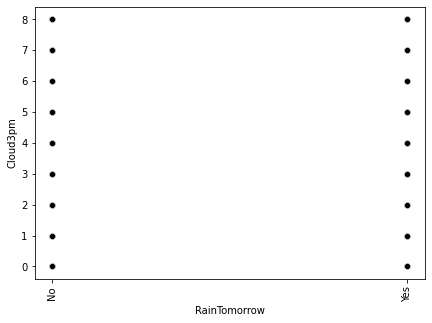



The Scatter Plot for the attribute "RainTomorrow" & "RainToday" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


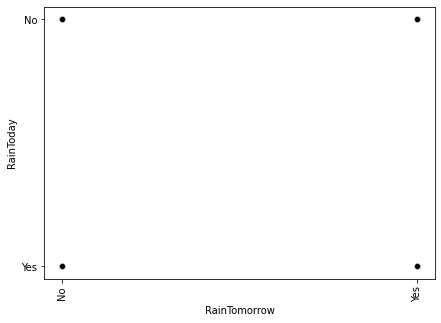



The Scatter Plot for the attribute "RainTomorrow" & "RainTomorrow" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


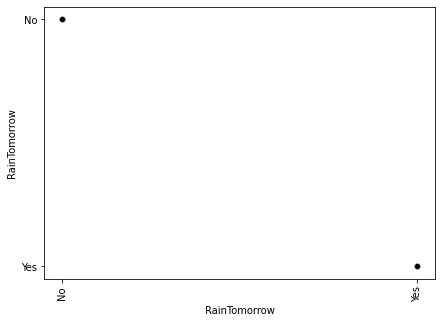

In [21]:
for i in df.columns.drop(['Date','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','Pressure9am','Pressure3pm','Temp9am','Temp3pm']):
    plt.figure(figsize=(7,5))
    print(f'The Scatter Plot for the attribute "RainTomorrow" & "{i}" is-\n {sns.scatterplot(df["RainTomorrow"],df[i],color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

Line Plot (x-axis=Rainfall)

The Line Plot for the attribute "Rainfall" & "Location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


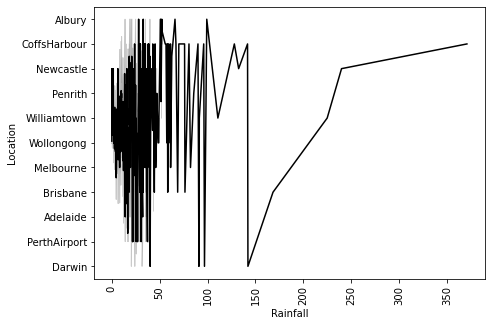



The Line Plot for the attribute "Rainfall" & "WindGustDir" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


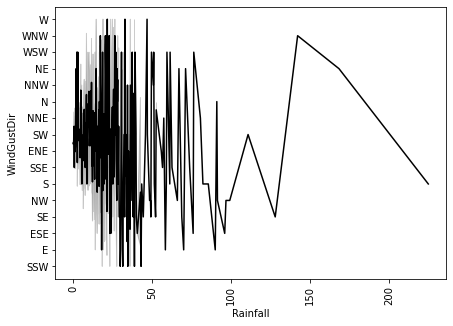



The Line Plot for the attribute "Rainfall" & "WindGustSpeed" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


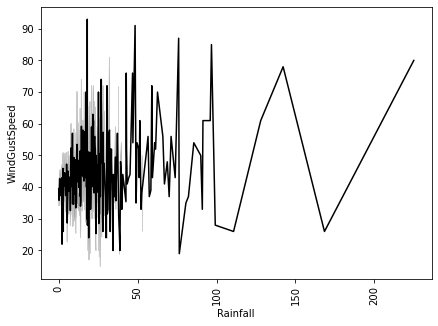



The Line Plot for the attribute "Rainfall" & "WindDir9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


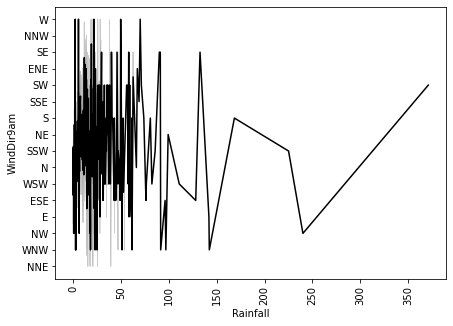



The Line Plot for the attribute "Rainfall" & "WindDir3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


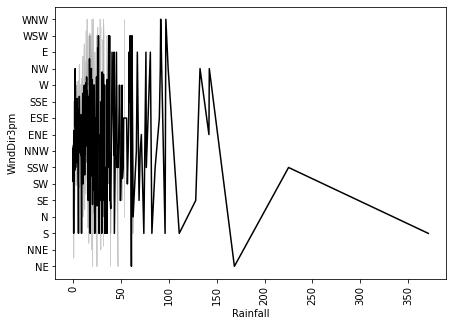



The Line Plot for the attribute "Rainfall" & "WindSpeed9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


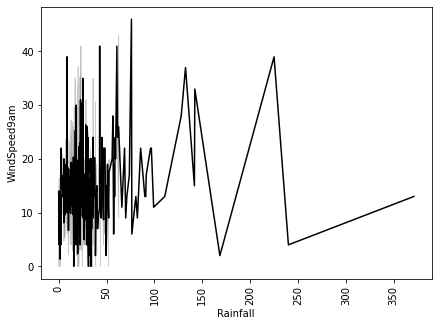



The Line Plot for the attribute "Rainfall" & "WindSpeed3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


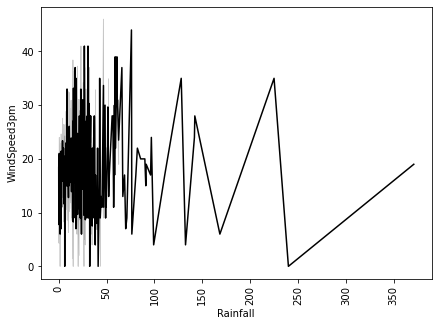



The Line Plot for the attribute "Rainfall" & "Humidity9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


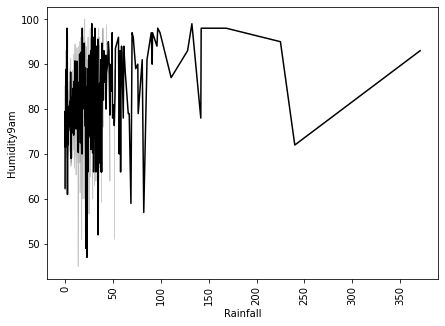



The Line Plot for the attribute "Rainfall" & "Humidity3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


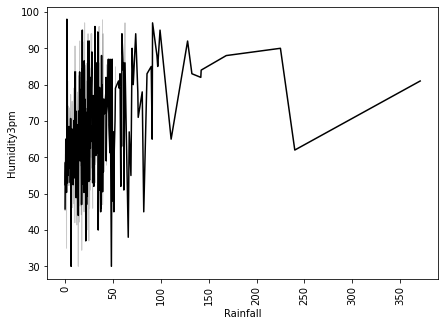



The Line Plot for the attribute "Rainfall" & "Cloud9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


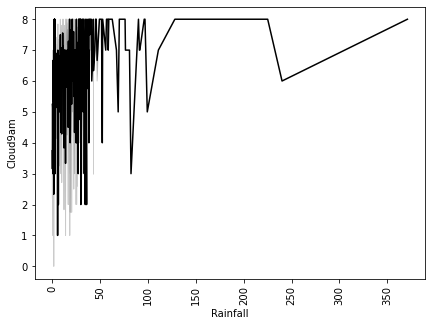



The Line Plot for the attribute "Rainfall" & "Cloud3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


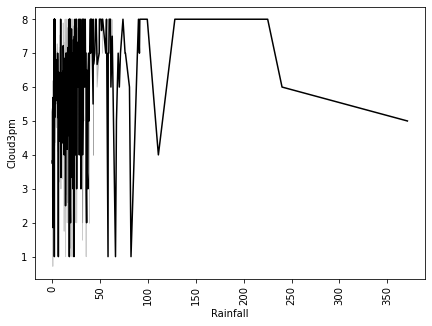



The Line Plot for the attribute "Rainfall" & "RainToday" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


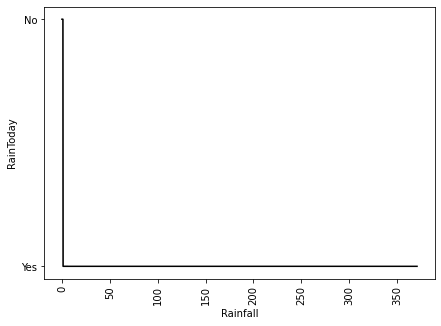



The Line Plot for the attribute "Rainfall" & "RainTomorrow" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


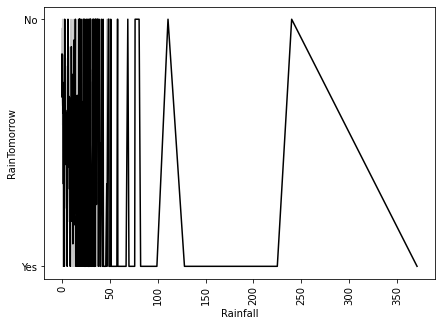

In [22]:
for i in df.columns.drop(['Date','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','Pressure9am','Pressure3pm','Temp9am','Temp3pm']):
    plt.figure(figsize=(7,5))
    print(f'The Line Plot for the attribute "Rainfall" & "{i}" is-\n {sns.lineplot(df["Rainfall"],df[i],color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### Categorical Plot

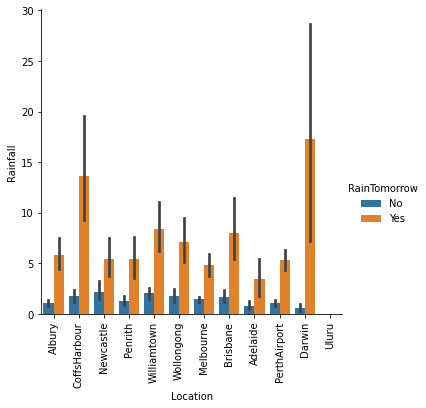

In [23]:
sns.catplot(x='Location',y='Rainfall',hue='RainTomorrow',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

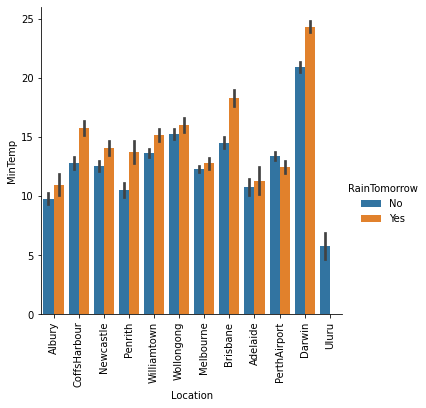

In [24]:
sns.catplot(x='Location',y='MinTemp',hue='RainTomorrow',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

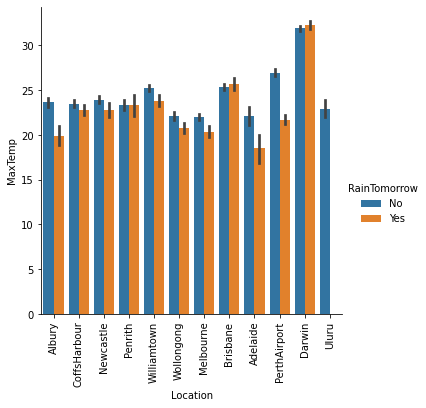

In [25]:
sns.catplot(x='Location',y='MaxTemp',hue='RainTomorrow',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

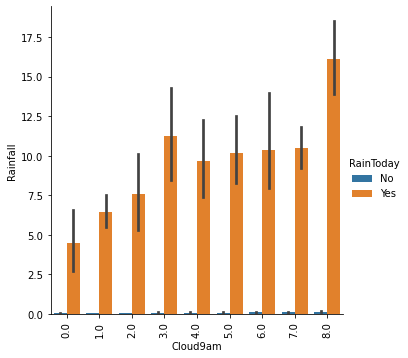

In [26]:
sns.catplot(x='Cloud9am',y='Rainfall',hue='RainToday',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

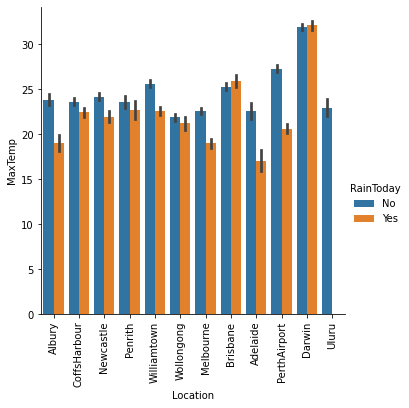

In [27]:
sns.catplot(x='Location',y='MaxTemp',hue='RainToday',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

#### Simple Imputer
To replace nan values of categorical and numeric columns w.r.t. mode and mean/median

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
#replacing nan of numerical columns with mean
for i in numeric_columns:
    df[i]=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(df[i].values.reshape(-1,1))

In [30]:
for i in categorical_columns:
    df[i]=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df[i].values.reshape(-1,1))

In [31]:
df.isnull().sum().sum()

0

###### We've successfully replaced all the nan values present in the dataset.

#### Encoding

Label Encoder

In [32]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [33]:
for j in categorical_columns:
    df[j]=LabelEncoder().fit_transform(df[j].astype(str))

In [34]:
df.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     0         1     13.4     22.9       0.6     5.389395  7.632205   
1     1         1      7.4     25.1       0.0     5.389395  7.632205   
2     2         1     12.9     25.7       0.0     5.389395  7.632205   
3     3         1      9.2     28.0       0.0     5.389395  7.632205   
4     4         1     17.5     32.3       1.0     5.389395  7.632205   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0           13           44.0          13  ...         71.0         22.0   
1           14           44.0           6  ...         44.0         25.0   
2           15           46.0          13  ...         38.0         30.0   
3            4           24.0           9  ...         45.0         16.0   
4           13           41.0           1  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8          0   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3          0   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2          0   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5          0   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

In [35]:
df.tail()

Date  Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2999         9      2.8  23.400000       0.0     5.389395  7.632205   
8421  3000         9      3.6  25.300000       0.0     5.389395  7.632205   
8422  3001         9      5.4  26.900000       0.0     5.389395  7.632205   
8423  3002         9      7.8  27.000000       0.0     5.389395  7.632205   
8424  3003         9     14.9  23.859976       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
8420            0      31.000000           9  ...         51.0         24.0   
8421            6      22.000000           9  ...         56.0         21.0   
8422            3      37.000000           9  ...         53.0         24.0   
8423            9      28.000000          10  ...         51.0         24.0   
8424            3      40.174469           2  ...         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3  4.566622  4.503183     10.1     22.4   
8421       1023.5       1019.1  4.566622  4.503183     10.9     24.5   
8422       1021.0       1016.8  4.566622  4.503183     12.5     26.1   
8423       1019.4       1016.5  3.000000  2.000000     15.1     26.0   
8424       1020.2       1017.9  8.000000  8.000000     15.0     20.9   

      RainToday  RainTomorrow  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             0  

[5 rows x 23 columns]

In [36]:
df.sample()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
5051   839         5     13.6     30.1       2.0          2.8       8.5   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
5051            3           39.0           3  ...         82.0         38.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
5051       1011.7       1007.6  4.566622  4.503183     16.9     28.9   

      RainToday  RainTomorrow  
5051          1             0  

[1 rows x 23 columns]

Violin Plot

The Violin-Plot for the attribute "Date" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


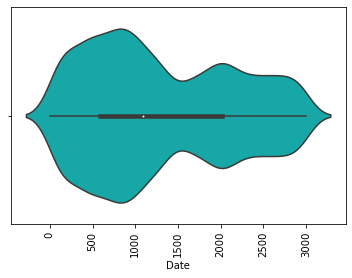



The Violin-Plot for the attribute "Location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


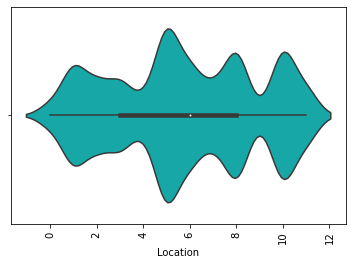



The Violin-Plot for the attribute "MinTemp" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


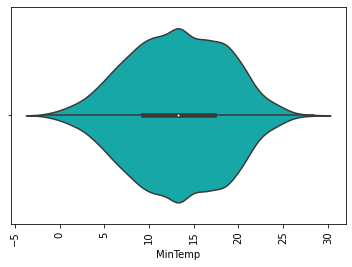



The Violin-Plot for the attribute "MaxTemp" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


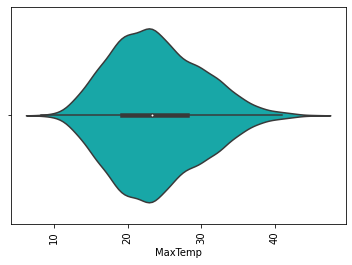



The Violin-Plot for the attribute "Rainfall" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


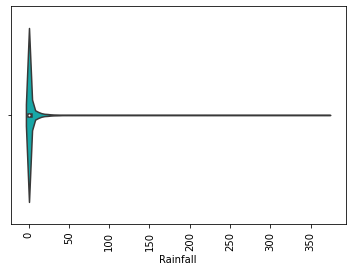



The Violin-Plot for the attribute "Evaporation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


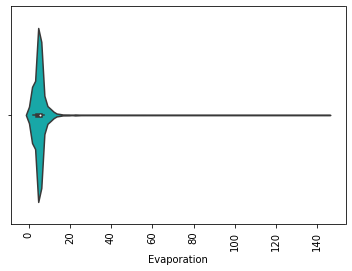



The Violin-Plot for the attribute "Sunshine" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


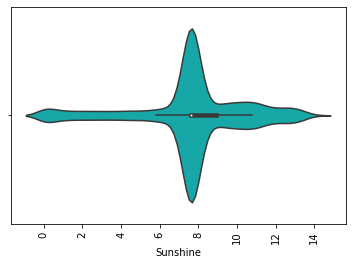



The Violin-Plot for the attribute "WindGustDir" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


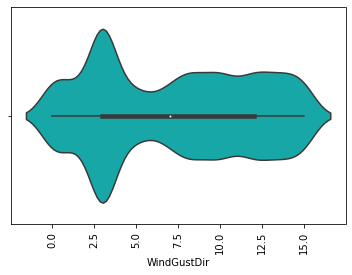



The Violin-Plot for the attribute "WindGustSpeed" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


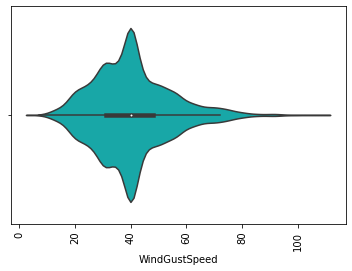



The Violin-Plot for the attribute "WindDir9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


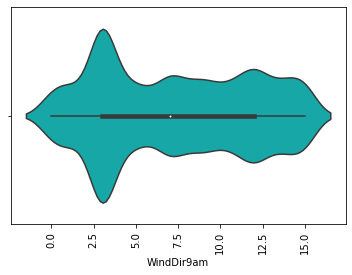



The Violin-Plot for the attribute "WindDir3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


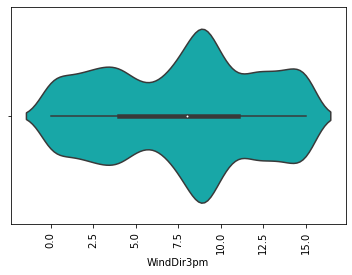



The Violin-Plot for the attribute "WindSpeed9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


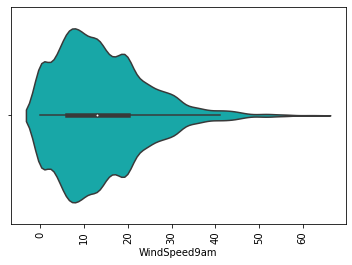



The Violin-Plot for the attribute "WindSpeed3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


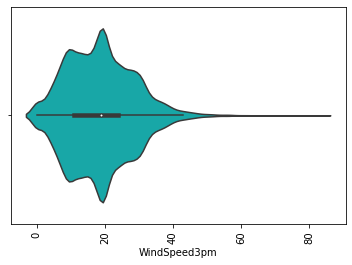



The Violin-Plot for the attribute "Humidity9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


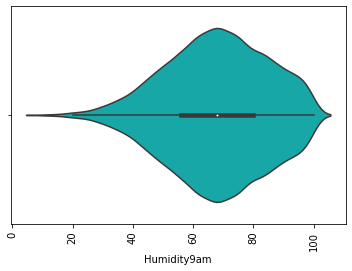



The Violin-Plot for the attribute "Humidity3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


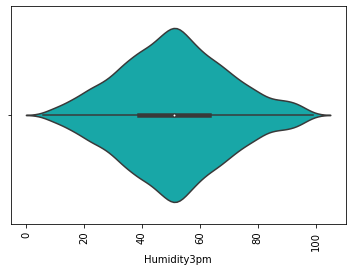



The Violin-Plot for the attribute "Pressure9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


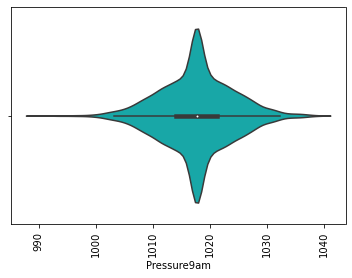



The Violin-Plot for the attribute "Pressure3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


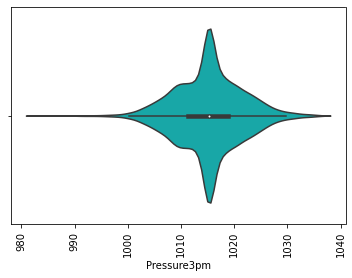



The Violin-Plot for the attribute "Cloud9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


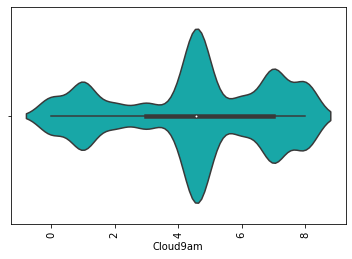



The Violin-Plot for the attribute "Cloud3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


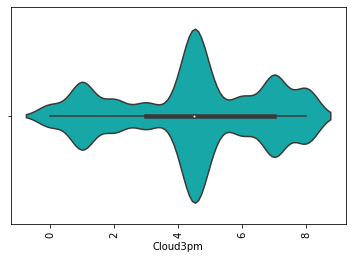



The Violin-Plot for the attribute "Temp9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


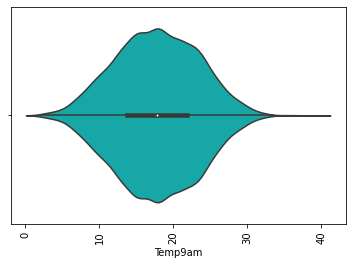



The Violin-Plot for the attribute "Temp3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


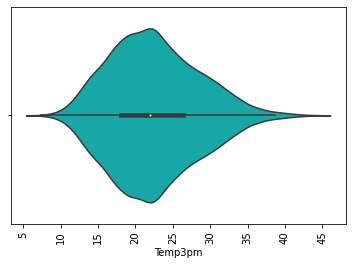



The Violin-Plot for the attribute "RainToday" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


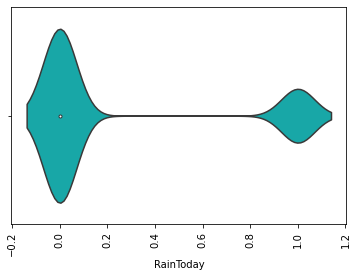



The Violin-Plot for the attribute "RainTomorrow" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


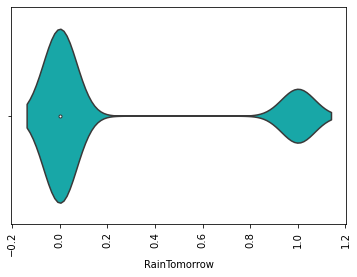

In [37]:
for i in df.columns:
    print(f'The Violin-Plot for the attribute "{i}" is-\n {sns.violinplot(df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### Descriptive Statistics

In [38]:
df.describe().T

count         mean         std    min          25%  \
Date           8425.0  1296.570564  854.249434    0.0   589.000000   
Location       8425.0     5.793591    3.162654    0.0     3.000000   
MinTemp        8425.0    13.193305    5.379488   -2.0     9.300000   
MaxTemp        8425.0    23.859976    6.114516    8.2    19.300000   
Rainfall       8425.0     2.805913   10.309308    0.0     0.000000   
Evaporation    8425.0     5.389395    3.852004    0.0     4.000000   
Sunshine       8425.0     7.632205    2.825451    0.0     7.632205   
WindGustDir    8425.0     7.217804    4.702616    0.0     3.000000   
WindGustSpeed  8425.0    40.174469   13.776101    7.0    31.000000   
WindDir9am     8425.0     7.267418    4.588045    0.0     3.000000   
WindDir3pm     8425.0     7.810445    4.430162    0.0     4.000000   
WindSpeed9am   8425.0    13.847646   10.128579    0.0     6.000000   
WindSpeed3pm   8425.0    18.533662    9.704759    0.0    11.000000   
Humidity9am    8425.0    67.822496   16.774231   10.0    56.000000   
Humidity3pm    8425.0    51.249790   18.311894    6.0    39.000000   
Pressure9am    8425.0  1017.640233    6.275759  989.8  1014.000000   
Pressure3pm    8425.0  1015.236075    6.217451  982.9  1011.400000   
Cloud9am       8425.0     4.566622    2.429205    0.0     3.000000   
Cloud3pm       8425.0     4.503183    2.299419    0.0     3.000000   
Temp9am        8425.0    17.762015    5.608301    1.9    13.800000   
Temp3pm        8425.0    22.442934    5.945849    7.3    18.100000   
RainToday      8425.0     0.236202    0.424773    0.0     0.000000   
RainTomorrow   8425.0     0.236320    0.424846    0.0     0.000000   

                       50%          75%     max  
Date           1088.000000  2021.000000  3003.0  
Location          6.000000     8.000000    11.0  
MinTemp          13.200000    17.300000    28.5  
MaxTemp          23.300000    28.000000    45.5  
Rainfall          0.000000     1.400000   371.0  
Evaporation       5.389395     5.389395   145.0  
Sunshine          7.632205     8.900000    13.9  
WindGustDir       7.000000    12.000000    15.0  
WindGustSpeed    40.174469    48.000000   107.0  
WindDir9am        7.000000    12.000000    15.0  
WindDir3pm        8.000000    11.000000    15.0  
WindSpeed9am     13.000000    20.000000    63.0  
WindSpeed3pm     19.000000    24.000000    83.0  
Humidity9am      68.000000    80.000000   100.0  
Humidity3pm      51.000000    63.000000    99.0  
Pressure9am    1017.640233  1021.300000  1039.0  
Pressure3pm    1015.236075  1018.800000  1036.0  
Cloud9am          4.566622     7.000000     8.0  
Cloud3pm          4.503183     7.000000     8.0  
Temp9am          17.762015    21.900000    39.4  
Temp3pm          22.000000    26.300000    44.1  
RainToday         0.000000     0.000000     1.0  
RainTomorrow      0.000000     0.000000     1.0

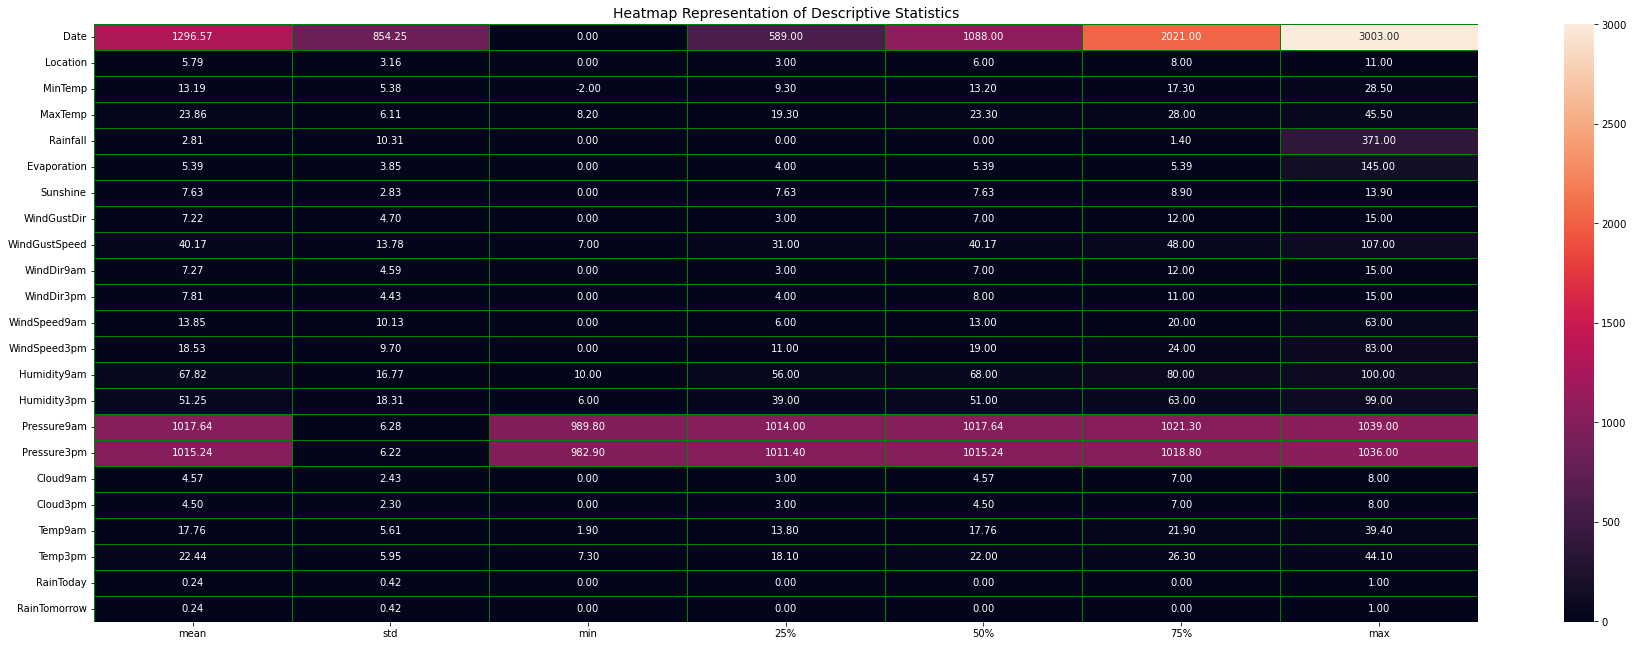

In [39]:
plt.figure(figsize=(31,11))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linecolor='Green',linewidth='0.5',fmt='0.2f')
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=14)
plt.show()

Correlation

In [40]:
df.corr()['Rainfall'].sort_values()

Sunshine        -0.169432
Temp3pm         -0.090687
MaxTemp         -0.087451
Pressure9am     -0.072668
Pressure3pm     -0.033649
Temp9am         -0.007083
Date             0.004945
Location         0.007693
Evaporation      0.023517
WindSpeed3pm     0.024791
WindDir3pm       0.038560
WindGustDir      0.038812
WindSpeed9am     0.050631
WindGustSpeed    0.086000
MinTemp          0.087684
WindDir9am       0.093821
Cloud3pm         0.150760
Cloud9am         0.185444
RainTomorrow     0.220021
Humidity9am      0.228800
Humidity3pm      0.235444
RainToday        0.461106
Rainfall         1.000000
Name: Rainfall, dtype: float64

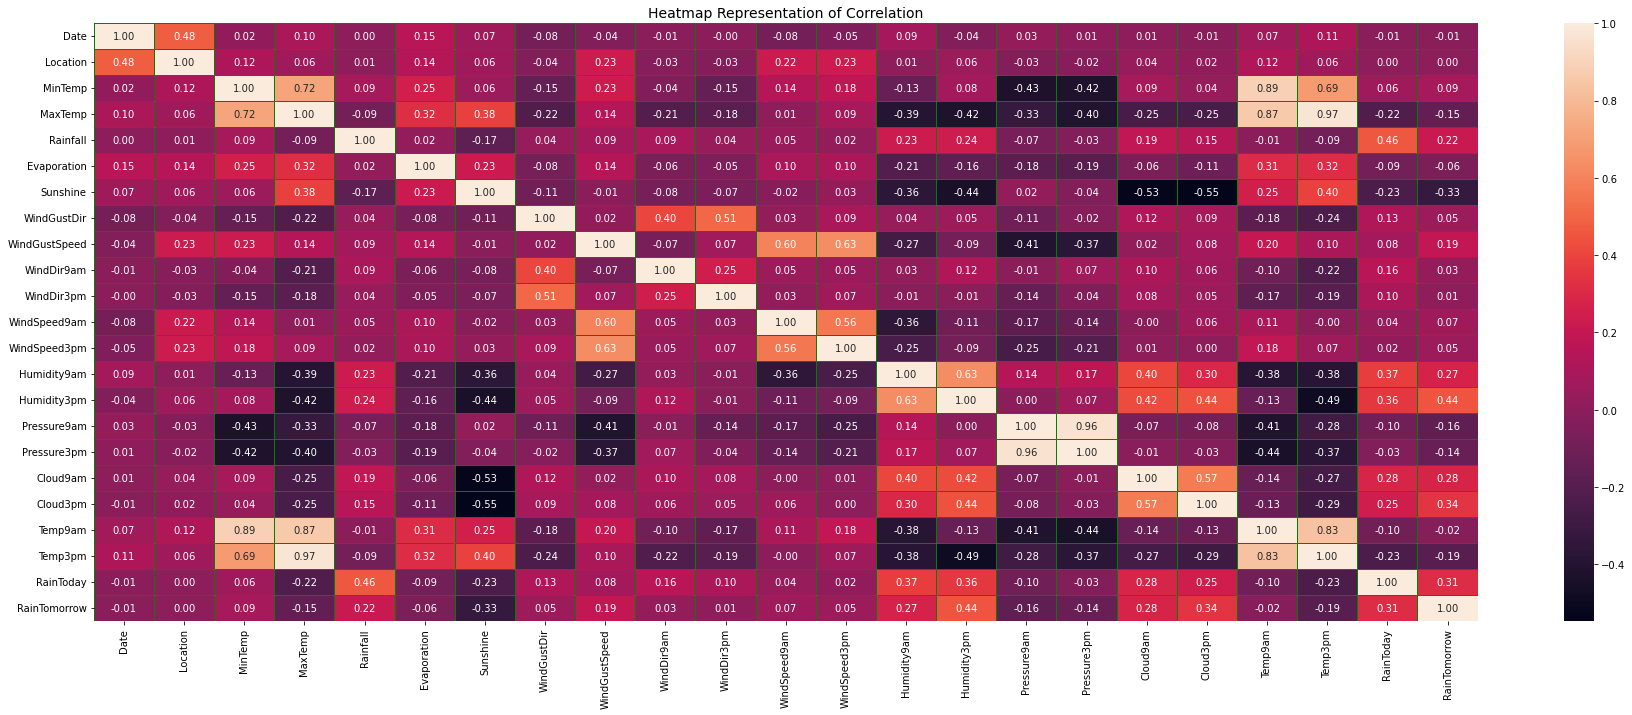

In [41]:
plt.figure(figsize=(31,11))
sns.heatmap(df.corr(),annot=True,linecolor='green',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Correlation',fontsize=14)
plt.show()

###### Multicollinearity

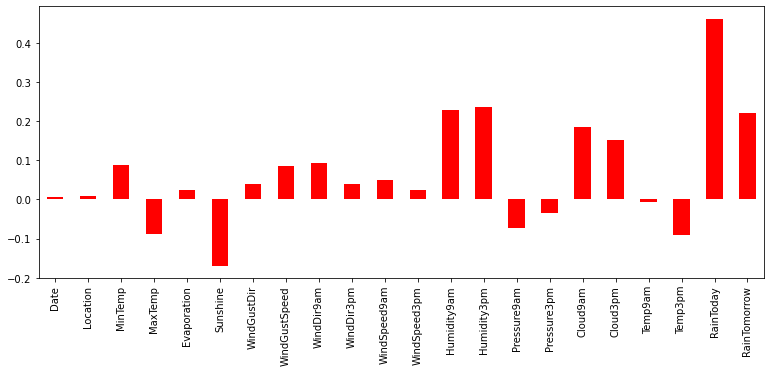

In [42]:
plt.figure(figsize=(13,5))
df.corr()['Rainfall'].drop(['Rainfall']).plot(kind='bar',color='r')
plt.show()

Skeweness

In [43]:
df.skew().sort_values()

Sunshine         -0.716525
Cloud9am         -0.366503
Cloud3pm         -0.276294
Humidity9am      -0.256743
WindDir3pm       -0.119847
MinTemp          -0.089989
Location         -0.050456
Pressure9am      -0.024082
Temp9am          -0.014748
Pressure3pm      -0.010214
Humidity3pm       0.118281
WindGustDir       0.119640
WindDir9am        0.172792
MaxTemp           0.380654
Date              0.386560
Temp3pm           0.397331
WindSpeed3pm      0.494217
WindGustSpeed     0.757000
WindSpeed9am      0.960591
RainTomorrow      1.241588
RainToday         1.242362
Rainfall         13.218403
Evaporation      14.023948
dtype: float64

###### Distribution Plot

The Distribution Plot for attribute "Date" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


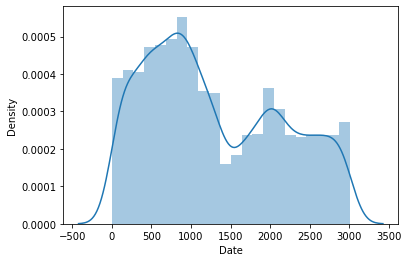



The Distribution Plot for attribute "Location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


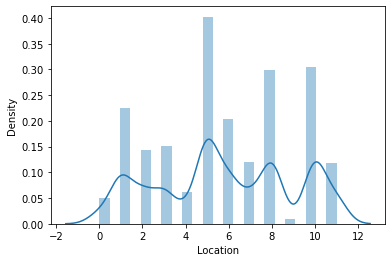



The Distribution Plot for attribute "MinTemp" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


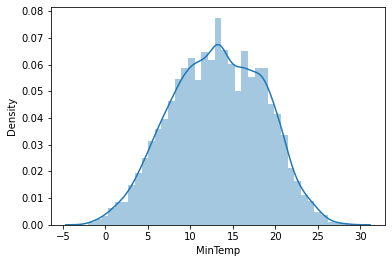



The Distribution Plot for attribute "MaxTemp" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


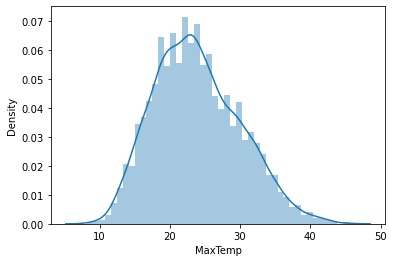



The Distribution Plot for attribute "Rainfall" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


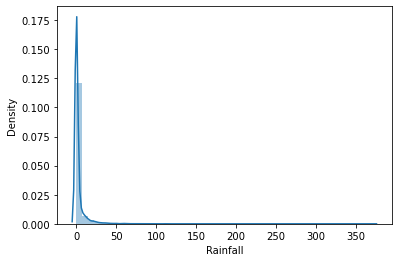



The Distribution Plot for attribute "Evaporation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


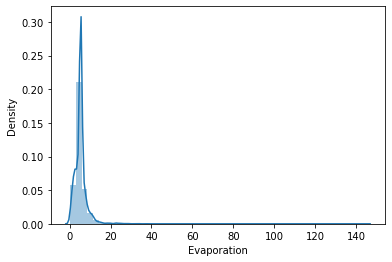



The Distribution Plot for attribute "Sunshine" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


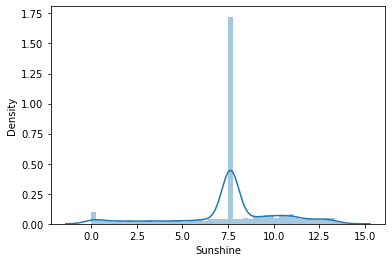



The Distribution Plot for attribute "WindGustDir" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


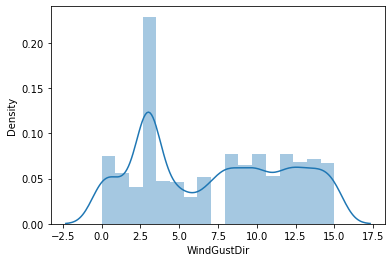



The Distribution Plot for attribute "WindGustSpeed" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


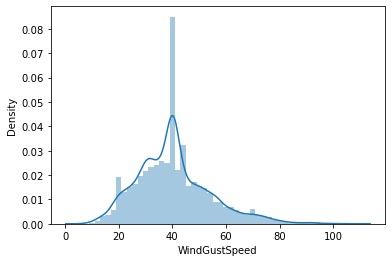



The Distribution Plot for attribute "WindDir9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


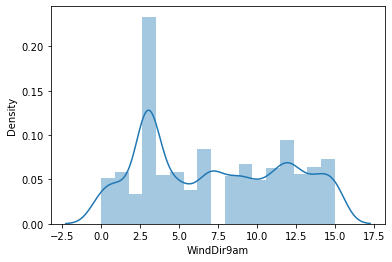



The Distribution Plot for attribute "WindDir3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


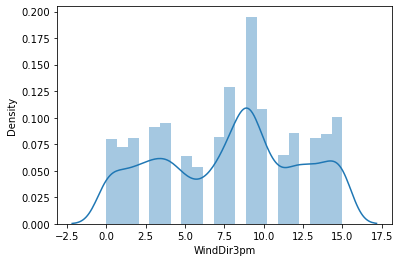



The Distribution Plot for attribute "WindSpeed9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


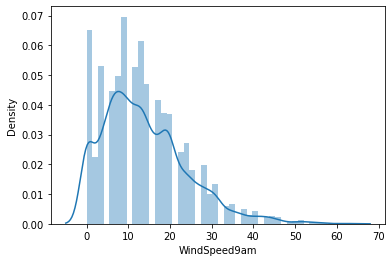



The Distribution Plot for attribute "WindSpeed3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


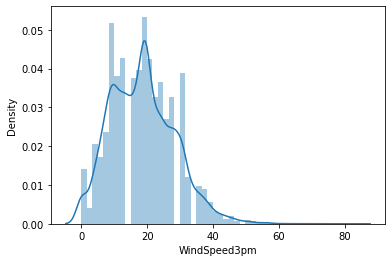



The Distribution Plot for attribute "Humidity9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


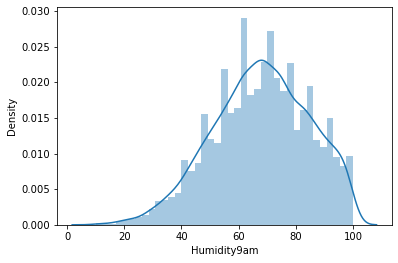



The Distribution Plot for attribute "Humidity3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


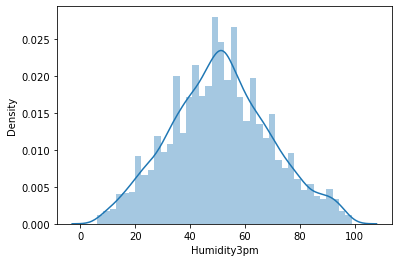



The Distribution Plot for attribute "Pressure9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


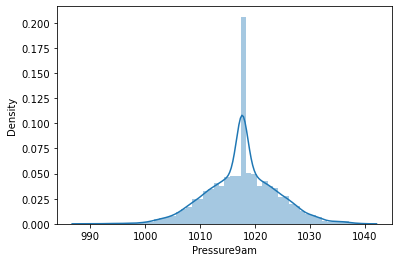



The Distribution Plot for attribute "Pressure3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


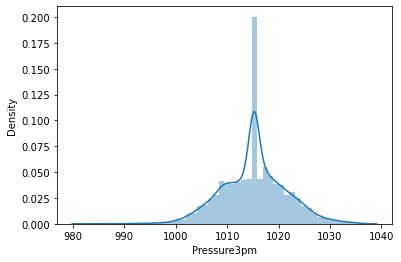



The Distribution Plot for attribute "Cloud9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


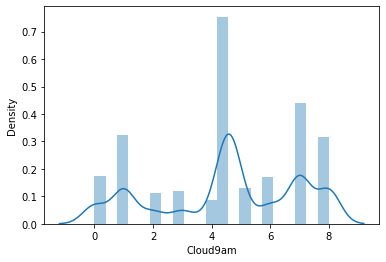



The Distribution Plot for attribute "Cloud3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


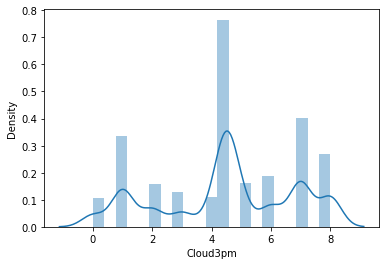



The Distribution Plot for attribute "Temp9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


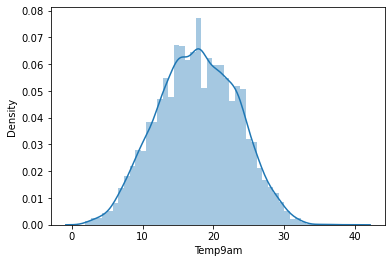



The Distribution Plot for attribute "Temp3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


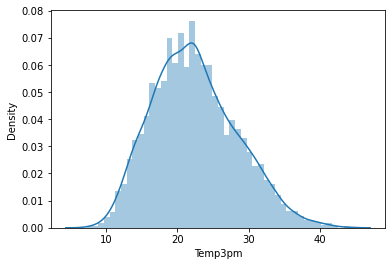



The Distribution Plot for attribute "RainToday" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


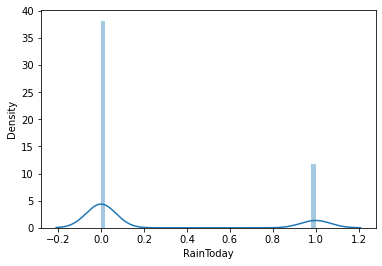



The Distribution Plot for attribute "RainTomorrow" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


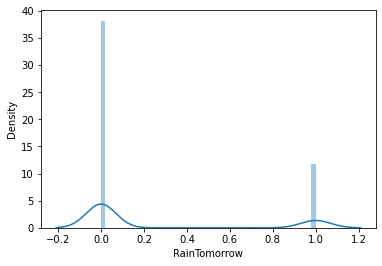

In [44]:
for i in df.columns:
    print(f'The Distribution Plot for attribute "{i}" is-\n {sns.distplot(df[i])}')
    plt.show()
    print('\n')

As we can see in the above distribution plots all of the attributes are skewed both right ad left hand side.Ergo,i'll remove the skewness later on the data cleansing section by power transfrorm or boxcox method

###### Outliers

In [45]:
z=np.abs(zscore(df))
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
         683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
         949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
        1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
        1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
        1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
        2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
        2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
        2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
        2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
        2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
        3059, 3060, 3066, 3067, 3067, 

In [46]:
print(z.iloc[12,15])
print(z.iloc[12,16])
print(z.iloc[44,3])

3.7193299828367716
3.5766094945083426
3.130445857854079


Box plot

The Box-Plot for attribute "Date" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


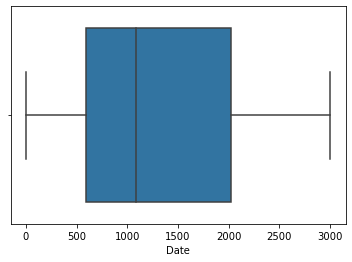



The Box-Plot for attribute "Location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


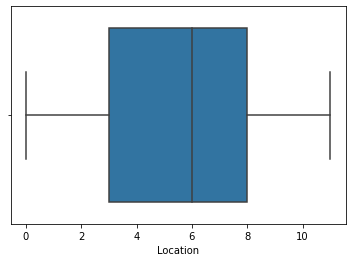



The Box-Plot for attribute "MinTemp" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


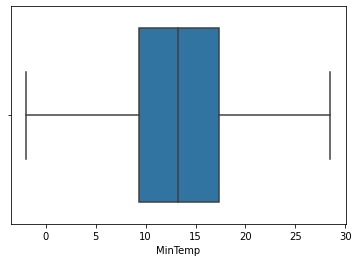



The Box-Plot for attribute "MaxTemp" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


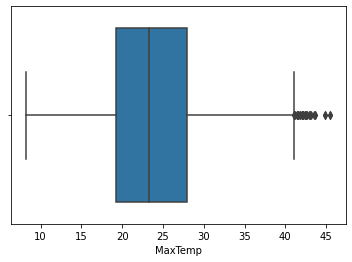



The Box-Plot for attribute "Rainfall" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


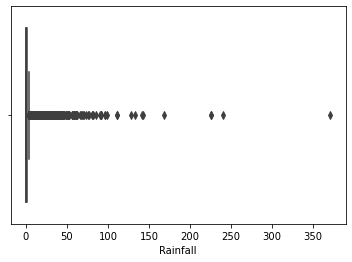



The Box-Plot for attribute "Evaporation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


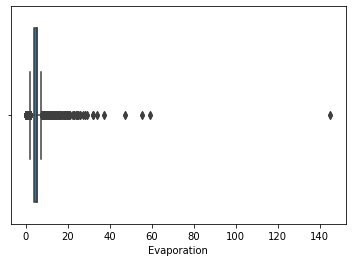



The Box-Plot for attribute "Sunshine" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


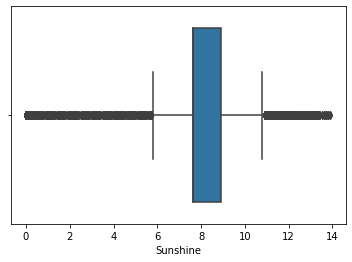



The Box-Plot for attribute "WindGustDir" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


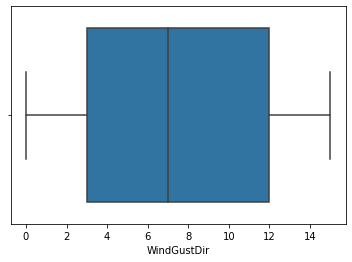



The Box-Plot for attribute "WindGustSpeed" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


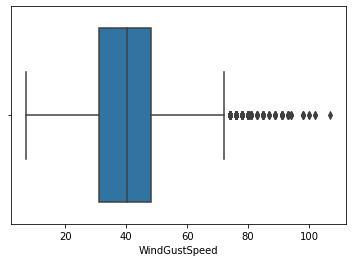



The Box-Plot for attribute "WindDir9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


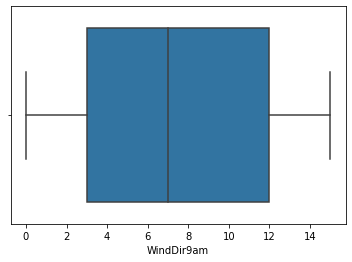



The Box-Plot for attribute "WindDir3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


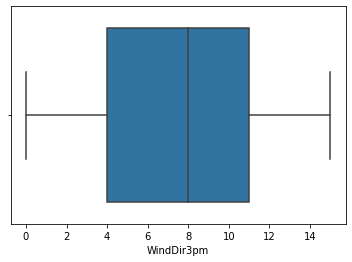



The Box-Plot for attribute "WindSpeed9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


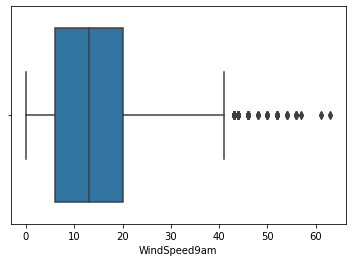



The Box-Plot for attribute "WindSpeed3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


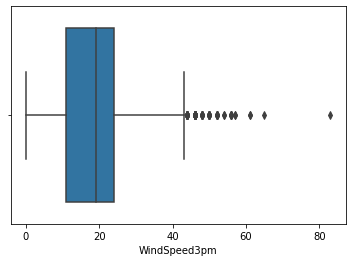



The Box-Plot for attribute "Humidity9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


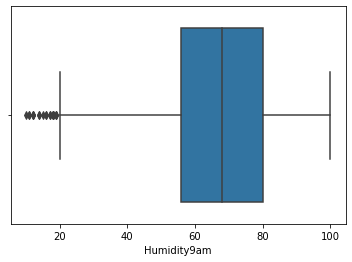



The Box-Plot for attribute "Humidity3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


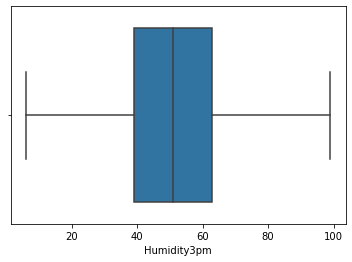



The Box-Plot for attribute "Pressure9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


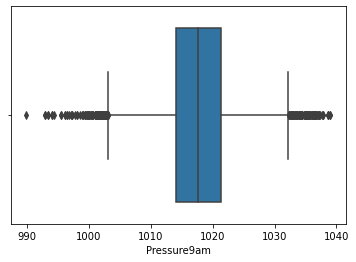



The Box-Plot for attribute "Pressure3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


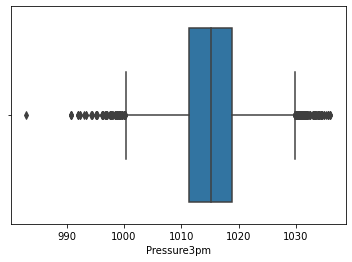



The Box-Plot for attribute "Cloud9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


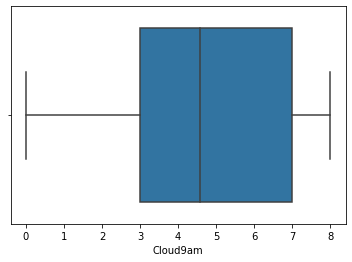



The Box-Plot for attribute "Cloud3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


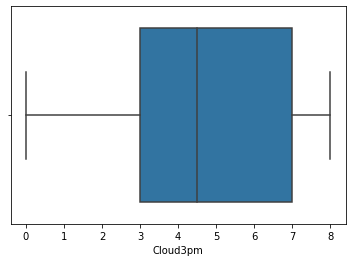



The Box-Plot for attribute "Temp9am" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


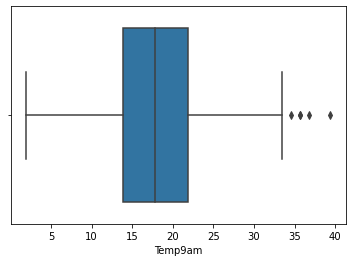



The Box-Plot for attribute "Temp3pm" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


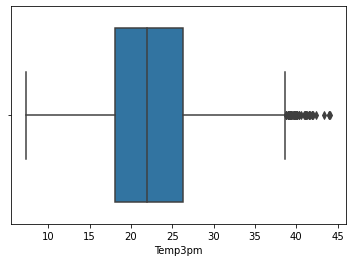



The Box-Plot for attribute "RainToday" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


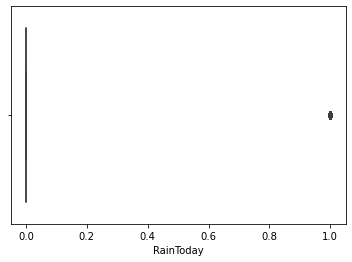



The Box-Plot for attribute "RainTomorrow" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


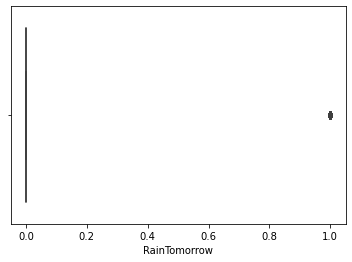

In [47]:
for i in df.columns:
    print(f'The Box-Plot for attribute "{i}" is-\n {sns.boxplot(df[i])}')
    plt.show()
    print('\n')

##### Data Cleansing
1.Remove Negative Correlation

In [48]:
df1=df.drop(['Temp9am','Location','Date'],axis=1)
df1

MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0        13.4  22.900000       0.6     5.389395  7.632205           13   
1         7.4  25.100000       0.0     5.389395  7.632205           14   
2        12.9  25.700000       0.0     5.389395  7.632205           15   
3         9.2  28.000000       0.0     5.389395  7.632205            4   
4        17.5  32.300000       1.0     5.389395  7.632205           13   
...       ...        ...       ...          ...       ...          ...   
8420      2.8  23.400000       0.0     5.389395  7.632205            0   
8421      3.6  25.300000       0.0     5.389395  7.632205            6   
8422      5.4  26.900000       0.0     5.389395  7.632205            3   
8423      7.8  27.000000       0.0     5.389395  7.632205            9   
8424     14.9  23.859976       0.0     5.389395  7.632205            3   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0         44.000000          13          14          20.0          24.0   
1         44.000000           6          15           4.0          22.0   
2         46.000000          13          15          19.0          26.0   
3         24.000000           9           0          11.0           9.0   
4         41.000000           1           7           7.0          20.0   
...             ...         ...         ...           ...           ...   
8420      31.000000           9           1          13.0          11.0   
8421      22.000000           9           3          13.0           9.0   
8422      37.000000           9          14           9.0           9.0   
8423      28.000000          10           3          13.0           7.0   
8424      40.174469           2           2          17.0          17.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0            71.0         22.0       1007.7       1007.1  8.000000  4.503183   
1            44.0         25.0       1010.6       1007.8  4.566622  4.503183   
2            38.0         30.0       1007.6       1008.7  4.566622  2.000000   
3            45.0         16.0       1017.6       1012.8  4.566622  4.503183   
4            82.0         33.0       1010.8       1006.0  7.000000  8.000000   
...           ...          ...          ...          ...       ...       ...   
8420         51.0         24.0       1024.6       1020.3  4.566622  4.503183   
8421         56.0         21.0       1023.5       1019.1  4.566622  4.503183   
8422         53.0         24.0       1021.0       1016.8  4.566622  4.503183   
8423         51.0         24.0       1019.4       1016.5  3.000000  2.000000   
8424         62.0         36.0       1020.2       1017.9  8.000000  8.000000   

      Temp3pm  RainToday  RainTomorrow  
0        21.8          0             0  
1        24.3          0             0  
2        23.2          0             0  
3        26.5          0             0  
4        29.7          0             0  
...       ...        ...           ...  
8420     22.4          0             0  
8421     24.5          0             0  
8422     26.1          0             0  
8423     26.0          0             0  
8424     20.9          0             0  

[8425 rows x 20 columns]

Removing Multicollinearity

In [49]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
x=df1.drop('Rainfall',axis=1)
x

MinTemp    MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0        13.4  22.900000     5.389395  7.632205           13      44.000000   
1         7.4  25.100000     5.389395  7.632205           14      44.000000   
2        12.9  25.700000     5.389395  7.632205           15      46.000000   
3         9.2  28.000000     5.389395  7.632205            4      24.000000   
4        17.5  32.300000     5.389395  7.632205           13      41.000000   
...       ...        ...          ...       ...          ...            ...   
8420      2.8  23.400000     5.389395  7.632205            0      31.000000   
8421      3.6  25.300000     5.389395  7.632205            6      22.000000   
8422      5.4  26.900000     5.389395  7.632205            3      37.000000   
8423      7.8  27.000000     5.389395  7.632205            9      28.000000   
8424     14.9  23.859976     5.389395  7.632205            3      40.174469   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0             13          14          20.0          24.0         71.0   
1              6          15           4.0          22.0         44.0   
2             13          15          19.0          26.0         38.0   
3              9           0          11.0           9.0         45.0   
4              1           7           7.0          20.0         82.0   
...          ...         ...           ...           ...          ...   
8420           9           1          13.0          11.0         51.0   
8421           9           3          13.0           9.0         56.0   
8422           9          14           9.0           9.0         53.0   
8423          10           3          13.0           7.0         51.0   
8424           2           2          17.0          17.0         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp3pm  \
0            22.0       1007.7       1007.1  8.000000  4.503183     21.8   
1            25.0       1010.6       1007.8  4.566622  4.503183     24.3   
2            30.0       1007.6       1008.7  4.566622  2.000000     23.2   
3            16.0       1017.6       1012.8  4.566622  4.503183     26.5   
4            33.0       1010.8       1006.0  7.000000  8.000000     29.7   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3  4.566622  4.503183     22.4   
8421         21.0       1023.5       1019.1  4.566622  4.503183     24.5   
8422         24.0       1021.0       1016.8  4.566622  4.503183     26.1   
8423         24.0       1019.4       1016.5  3.000000  2.000000     26.0   
8424         36.0       1020.2       1017.9  8.000000  8.000000     20.9   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             0  

[8425 rows x 19 columns]

In [51]:
def vif():
    df2=pd.DataFrame()
    df2['Features']=x.columns
    df2['VIF_Score']=[variance_inflation_factor(x.values,k) for k in range(x.shape[1])]
    print(df2)

In [52]:
vif()

         Features      VIF_Score
0         MinTemp      35.272567
1         MaxTemp     412.548383
2     Evaporation       3.455684
3        Sunshine      15.154025
4     WindGustDir       5.249089
5   WindGustSpeed      21.318592
6      WindDir9am       4.684807
7      WindDir3pm       5.992891
8    WindSpeed9am       5.690122
9    WindSpeed3pm       8.832568
10    Humidity9am      43.935890
11    Humidity3pm      37.330180
12    Pressure9am  513241.826066
13    Pressure3pm  512484.558447
14       Cloud9am       8.618471
15       Cloud3pm       8.856517
16        Temp3pm     463.524005
17      RainToday       1.802830
18   RainTomorrow       1.885008


##### Attributes (MaxTemp,Temp3pm) and (Pressure9am,Pressure3pm) are providing the same informatiom to the target variable hence will drop the attributes which are less correlative w.r.t. target variables

In [53]:
df3=df1.drop(['Temp3pm','Pressure9am'],axis=1)
df3

MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0        13.4  22.900000       0.6     5.389395  7.632205           13   
1         7.4  25.100000       0.0     5.389395  7.632205           14   
2        12.9  25.700000       0.0     5.389395  7.632205           15   
3         9.2  28.000000       0.0     5.389395  7.632205            4   
4        17.5  32.300000       1.0     5.389395  7.632205           13   
...       ...        ...       ...          ...       ...          ...   
8420      2.8  23.400000       0.0     5.389395  7.632205            0   
8421      3.6  25.300000       0.0     5.389395  7.632205            6   
8422      5.4  26.900000       0.0     5.389395  7.632205            3   
8423      7.8  27.000000       0.0     5.389395  7.632205            9   
8424     14.9  23.859976       0.0     5.389395  7.632205            3   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0         44.000000          13          14          20.0          24.0   
1         44.000000           6          15           4.0          22.0   
2         46.000000          13          15          19.0          26.0   
3         24.000000           9           0          11.0           9.0   
4         41.000000           1           7           7.0          20.0   
...             ...         ...         ...           ...           ...   
8420      31.000000           9           1          13.0          11.0   
8421      22.000000           9           3          13.0           9.0   
8422      37.000000           9          14           9.0           9.0   
8423      28.000000          10           3          13.0           7.0   
8424      40.174469           2           2          17.0          17.0   

      Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  RainToday  \
0            71.0         22.0       1007.1  8.000000  4.503183          0   
1            44.0         25.0       1007.8  4.566622  4.503183          0   
2            38.0         30.0       1008.7  4.566622  2.000000          0   
3            45.0         16.0       1012.8  4.566622  4.503183          0   
4            82.0         33.0       1006.0  7.000000  8.000000          0   
...           ...          ...          ...       ...       ...        ...   
8420         51.0         24.0       1020.3  4.566622  4.503183          0   
8421         56.0         21.0       1019.1  4.566622  4.503183          0   
8422         53.0         24.0       1016.8  4.566622  4.503183          0   
8423         51.0         24.0       1016.5  3.000000  2.000000          0   
8424         62.0         36.0       1017.9  8.000000  8.000000          0   

      RainTomorrow  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
8420             0  
8421             0  
8422             0  
8423             0  
8424             0  

[8425 rows x 18 columns]

###### Removing Outliers

In [54]:
df4=df3[(z<3).all(axis=1)]
df4

MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0        13.4  22.900000       0.6     5.389395  7.632205           13   
1         7.4  25.100000       0.0     5.389395  7.632205           14   
2        12.9  25.700000       0.0     5.389395  7.632205           15   
3         9.2  28.000000       0.0     5.389395  7.632205            4   
4        17.5  32.300000       1.0     5.389395  7.632205           13   
...       ...        ...       ...          ...       ...          ...   
8420      2.8  23.400000       0.0     5.389395  7.632205            0   
8421      3.6  25.300000       0.0     5.389395  7.632205            6   
8422      5.4  26.900000       0.0     5.389395  7.632205            3   
8423      7.8  27.000000       0.0     5.389395  7.632205            9   
8424     14.9  23.859976       0.0     5.389395  7.632205            3   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0         44.000000          13          14          20.0          24.0   
1         44.000000           6          15           4.0          22.0   
2         46.000000          13          15          19.0          26.0   
3         24.000000           9           0          11.0           9.0   
4         41.000000           1           7           7.0          20.0   
...             ...         ...         ...           ...           ...   
8420      31.000000           9           1          13.0          11.0   
8421      22.000000           9           3          13.0           9.0   
8422      37.000000           9          14           9.0           9.0   
8423      28.000000          10           3          13.0           7.0   
8424      40.174469           2           2          17.0          17.0   

      Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  RainToday  \
0            71.0         22.0       1007.1  8.000000  4.503183          0   
1            44.0         25.0       1007.8  4.566622  4.503183          0   
2            38.0         30.0       1008.7  4.566622  2.000000          0   
3            45.0         16.0       1012.8  4.566622  4.503183          0   
4            82.0         33.0       1006.0  7.000000  8.000000          0   
...           ...          ...          ...       ...       ...        ...   
8420         51.0         24.0       1020.3  4.566622  4.503183          0   
8421         56.0         21.0       1019.1  4.566622  4.503183          0   
8422         53.0         24.0       1016.8  4.566622  4.503183          0   
8423         51.0         24.0       1016.5  3.000000  2.000000          0   
8424         62.0         36.0       1017.9  8.000000  8.000000          0   

      RainTomorrow  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
8420             0  
8421             0  
8422             0  
8423             0  
8424             0  

[7987 rows x 18 columns]

In [55]:
print(df3.shape)
print(df4.shape)

(8425, 18)
(7987, 18)


In [56]:
percentage_loss=(8425-7987)*100/8425
percentage_loss

5.198813056379822

###### I'm getting the percentage loss is about 5% which is decent because our dataset is large having 8425 rows and out of it we are loosing only 5% rows.Now we can move ahead by considering it

Removing Skewness

Power_Transformer

In [57]:
from sklearn.preprocessing import PowerTransformer

In [58]:
x=df4.drop('Rainfall',axis=1)
x

MinTemp    MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0        13.4  22.900000     5.389395  7.632205           13      44.000000   
1         7.4  25.100000     5.389395  7.632205           14      44.000000   
2        12.9  25.700000     5.389395  7.632205           15      46.000000   
3         9.2  28.000000     5.389395  7.632205            4      24.000000   
4        17.5  32.300000     5.389395  7.632205           13      41.000000   
...       ...        ...          ...       ...          ...            ...   
8420      2.8  23.400000     5.389395  7.632205            0      31.000000   
8421      3.6  25.300000     5.389395  7.632205            6      22.000000   
8422      5.4  26.900000     5.389395  7.632205            3      37.000000   
8423      7.8  27.000000     5.389395  7.632205            9      28.000000   
8424     14.9  23.859976     5.389395  7.632205            3      40.174469   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0             13          14          20.0          24.0         71.0   
1              6          15           4.0          22.0         44.0   
2             13          15          19.0          26.0         38.0   
3              9           0          11.0           9.0         45.0   
4              1           7           7.0          20.0         82.0   
...          ...         ...           ...           ...          ...   
8420           9           1          13.0          11.0         51.0   
8421           9           3          13.0           9.0         56.0   
8422           9          14           9.0           9.0         53.0   
8423          10           3          13.0           7.0         51.0   
8424           2           2          17.0          17.0         62.0   

      Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  RainToday  RainTomorrow  
0            22.0       1007.1  8.000000  4.503183          0             0  
1            25.0       1007.8  4.566622  4.503183          0             0  
2            30.0       1008.7  4.566622  2.000000          0             0  
3            16.0       1012.8  4.566622  4.503183          0             0  
4            33.0       1006.0  7.000000  8.000000          0             0  
...           ...          ...       ...       ...        ...           ...  
8420         24.0       1020.3  4.566622  4.503183          0             0  
8421         21.0       1019.1  4.566622  4.503183          0             0  
8422         24.0       1016.8  4.566622  4.503183          0             0  
8423         24.0       1016.5  3.000000  2.000000          0             0  
8424         36.0       1017.9  8.000000  8.000000          0             0  

[7987 rows x 17 columns]

In [59]:
pt=PowerTransformer(method='yeo-johnson')
x=pt.fit_transform(x)
x

array([[ 6.05015740e-02, -7.57272296e-02,  1.86310827e-01, ...,
        -9.87238955e-04, -5.42475525e-01, -5.43635296e-01],
       [-1.05725282e+00,  2.87144714e-01,  1.86310827e-01, ...,
        -9.87238955e-04, -5.42475525e-01, -5.43635296e-01],
       [-3.22219600e-02,  3.82999789e-01,  1.86310827e-01, ...,
        -1.08215177e+00, -5.42475525e-01, -5.43635296e-01],
       ...,
       [-1.43299533e+00,  5.71022930e-01,  1.86310827e-01, ...,
        -9.87238955e-04, -5.42475525e-01, -5.43635296e-01],
       [-9.82333711e-01,  5.86477671e-01,  1.86310827e-01, ...,
        -1.08215177e+00, -5.42475525e-01, -5.43635296e-01],
       [ 3.38295674e-01,  8.49017248e-02,  1.86310827e-01, ...,
         1.55904423e+00, -5.42475525e-01, -5.43635296e-01]])

In [60]:
df4.skew().sort_values()

Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
WindDir3pm      -0.126255
MinTemp         -0.084549
Pressure3pm      0.044876
WindGustDir      0.112339
Humidity3pm      0.125150
WindDir9am       0.160081
WindSpeed3pm     0.300109
MaxTemp          0.314510
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Evaporation      0.846181
RainTomorrow     1.296077
RainToday        1.301170
Rainfall         3.488446
dtype: float64

In [61]:
for i in ['Evaporation','WindSpeed9am','Sunshine']:
    df4[i]=np.sqrt(df4[i])

In [62]:
df4.skew().sort_values()

Sunshine        -2.045075
WindSpeed9am    -0.517704
Evaporation     -0.410953
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
WindDir3pm      -0.126255
MinTemp         -0.084549
Pressure3pm      0.044876
WindGustDir      0.112339
Humidity3pm      0.125150
WindDir9am       0.160081
WindSpeed3pm     0.300109
MaxTemp          0.314510
WindGustSpeed    0.506897
RainTomorrow     1.296077
RainToday        1.301170
Rainfall         3.488446
dtype: float64

Standard Scaler

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [64]:
x=df4.drop('Rainfall',axis=1)
x

MinTemp    MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0        13.4  22.900000     2.321507  2.762645           13      44.000000   
1         7.4  25.100000     2.321507  2.762645           14      44.000000   
2        12.9  25.700000     2.321507  2.762645           15      46.000000   
3         9.2  28.000000     2.321507  2.762645            4      24.000000   
4        17.5  32.300000     2.321507  2.762645           13      41.000000   
...       ...        ...          ...       ...          ...            ...   
8420      2.8  23.400000     2.321507  2.762645            0      31.000000   
8421      3.6  25.300000     2.321507  2.762645            6      22.000000   
8422      5.4  26.900000     2.321507  2.762645            3      37.000000   
8423      7.8  27.000000     2.321507  2.762645            9      28.000000   
8424     14.9  23.859976     2.321507  2.762645            3      40.174469   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0             13          14      4.472136          24.0         71.0   
1              6          15      2.000000          22.0         44.0   
2             13          15      4.358899          26.0         38.0   
3              9           0      3.316625           9.0         45.0   
4              1           7      2.645751          20.0         82.0   
...          ...         ...           ...           ...          ...   
8420           9           1      3.605551          11.0         51.0   
8421           9           3      3.605551           9.0         56.0   
8422           9          14      3.000000           9.0         53.0   
8423          10           3      3.605551           7.0         51.0   
8424           2           2      4.123106          17.0         62.0   

      Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  RainToday  RainTomorrow  
0            22.0       1007.1  8.000000  4.503183          0             0  
1            25.0       1007.8  4.566622  4.503183          0             0  
2            30.0       1008.7  4.566622  2.000000          0             0  
3            16.0       1012.8  4.566622  4.503183          0             0  
4            33.0       1006.0  7.000000  8.000000          0             0  
...           ...          ...       ...       ...        ...           ...  
8420         24.0       1020.3  4.566622  4.503183          0             0  
8421         21.0       1019.1  4.566622  4.503183          0             0  
8422         24.0       1016.8  4.566622  4.503183          0             0  
8423         24.0       1016.5  3.000000  2.000000          0             0  
8424         36.0       1017.9  8.000000  8.000000          0             0  

[7987 rows x 17 columns]

In [65]:
x=sc.fit_transform(x)
x

array([[ 0.05644354, -0.14573194,  0.22368996, ...,  0.01313815,
        -0.54247553, -0.5436353 ],
       [-1.05847646,  0.22067594,  0.22368996, ...,  0.01313815,
        -0.54247553, -0.5436353 ],
       [-0.03646646,  0.32060536,  0.22368996, ..., -1.07666074,
        -0.54247553, -0.5436353 ],
       ...,
       [-1.43011646,  0.5204642 ,  0.22368996, ...,  0.01313815,
        -0.54247553, -0.5436353 ],
       [-0.98414846,  0.5371191 ,  0.22368996, ..., -1.07666074,
        -0.54247553, -0.5436353 ],
       [ 0.33517354,  0.01415115,  0.22368996, ...,  1.5355312 ,
        -0.54247553, -0.5436353 ]])

In [66]:
x.mean()

1.3707536821231607e-15

In [67]:
x.std()

1.0

<AxesSubplot:ylabel='Density'>

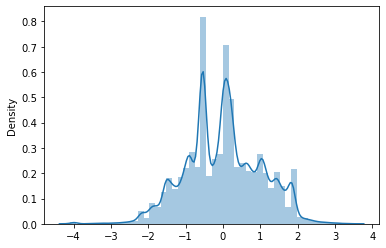

In [68]:
sns.distplot(x)

PCA

In [69]:
from sklearn.decomposition import PCA

In [70]:
#reducing the variables into 5 components
pca=PCA(n_components=5)
x=pca.fit_transform(x)
x

array([[ 0.3638745 ,  1.27936751, -1.8921432 , -1.45622078, -1.23604952],
       [ 1.21871175,  0.00461379, -1.84200076, -1.22906611, -1.28930091],
       [ 1.77852158,  1.06004731, -2.81950184, -1.42092834, -0.67684085],
       ...,
       [ 0.93968843, -1.33749814, -0.90467347, -0.29442827, -1.15130125],
       [ 1.55019077, -1.85158688, -0.59059352, -0.10069364, -0.36929743],
       [ 0.29974974,  0.25148213,  1.28731533,  1.37787288, -1.8193901 ]])

In [71]:
#target variable
y=df4['Rainfall']
y

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 7987, dtype: float64

In [72]:
print(x.shape)
print(y.shape)

(7987, 5)
(7987,)


Plotting the Relationship between Principle Components

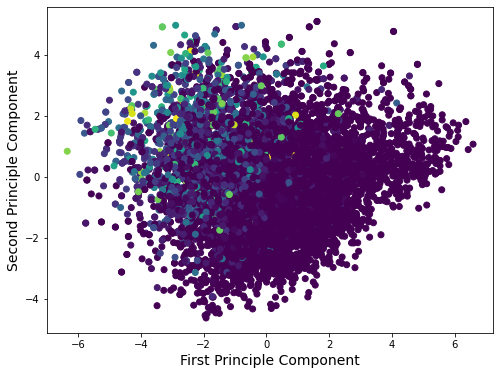

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0:1],x[:,1:2],c=y)
plt.xlabel('First Principle Component',fontsize=14)
plt.ylabel('Second Principle Component',fontsize=14)
plt.show()

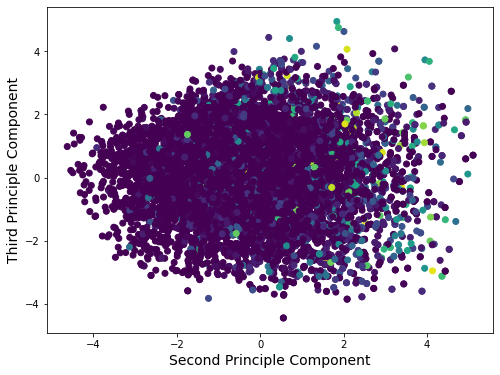

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,1],x[:,2],c=y)
plt.xlabel('Second Principle Component',fontsize=14)
plt.ylabel('Third Principle Component',fontsize=14)
plt.show()

#### Above two diagrams tells us that our feature variables are distributed and mixed well
Training_Testing Phase
I am going to train 80% of the data and testing size would be 20%
first will try to find out the best value for random_state

In [75]:
#importing machine learning libraries for regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr=LinearRegression()

In [76]:
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if(r2_score(train_pred,y_train))==(r2_score(test_pred,y_test)):
        print(f'At Random_State {i} the training accuracy and testing accuracy both are same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'The Mean Absolute Error is(MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is(MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error(RMSE) is- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')
    else:
        print(f'At Random_State {i} the training accuracy and testing accuracy both are not same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'\nThe Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')

At Random_State 0 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.7768051580755837
Testing Accuracy is -0.8005455010261628

The Mean Absolute Error is (MAE)- 2.2417557845707923
The Mean Squared Error is (MSE)- 14.036239666741636
The Root Mean Squared Error is (RMSE)- 3.746496986084686


At Random_State 1 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.8346593855645632
Testing Accuracy is -0.8538504131876954

The Mean Absolute Error is (MAE)- 2.2935485966674256
The Mean Squared Error is (MSE)- 15.333655776956077
The Root Mean Squared Error is (RMSE)- 3.9158212136097426


At Random_State 2 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.8104518143981665
Testing Accuracy is -1.0562224852505473

The Mean Absolute Error is (MAE)- 2.316549536777316
The Mean Squared Error is (MSE)- 16.781295733968964
The Root Mean Squared Error is (RMSE)- 4.096497984128512


At Random_State 3 the tra

Find out the CV Score

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
for n in range(2,5):
    cvscore=cross_val_score(lr,x,y,cv=n)
    mean=cvscore.mean()
    std=cvscore.std()
    print(f'At K-Fold {n} The CV Score of Linear Regression Model is {mean*100} and Standard Deviation is {std}')
    print('\n')

At K-Fold 2 The CV Score of Linear Regression Model is 35.06325706919522 and Standard Deviation is 0.002355190373578786


At K-Fold 3 The CV Score of Linear Regression Model is 34.80028842242522 and Standard Deviation is 0.011770766197784409


At K-Fold 4 The CV Score of Linear Regression Model is 34.89398168408585 and Standard Deviation is 0.020886726627205702




In [79]:
#importing other libraries
from sklearn.linear_model import Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
ls=Lasso()
rd=Ridge()
en=ElasticNet()
sgd=SGDRegressor()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
grd=GradientBoostingRegressor()

In [80]:
#creating a definition to expand the model individually
def model(m,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    m.fit(x_train,y_train)
    train_pred=m.predict(x_train)
    test_pred=m.predict(x_test)
    print(f'Training Accuracy of model {m} is {r2_score(train_pred,y_train)}')
    print(f'Testing Accuracy of model {m} is {r2_score(test_pred,y_test)}')
    print('\nError in the model is calculated below-\n')
    print(f'The Mean Absolute Error is (MAE) {mean_absolute_error(test_pred,y_test)}')
    print(f'The Mean Squared Error is (MSE) {mean_squared_error(test_pred,y_test)}')
    print(f'The Root Mean Squared Error is (RMSE) {np.sqrt(mean_squared_error(test_pred,y_test))}')
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for j in range(2,5):
        cvs=cross_val_score(m,x,y,cv=j)
        cvs.mean()
        cvs.std()
        print(f'At K-Fold {j} the CV Score of model {m} is {cvs.mean()*100} & std is {cvs.std()}')
        print('\n')
    print('\n\t')
    plt.scatter(y_test,test_pred,color='c')
    plt.plot(y_test,y_test,color='m')
    plt.xlabel("Actual Rainfall",fontsize=15)
    plt.ylabel("Predicted Rainfall",fontsize=15)
    plt.title(f"Best Fitted Line for the model {m}",fontsize=18)
    plt.show()

Training Accuracy of model Lasso() is -5.955657827931123
Testing Accuracy of model Lasso() is -7.008726675836138

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 2.226677392816652
The Mean Squared Error is (MSE) 18.631474883564287
The Root Mean Squared Error is (RMSE) 4.316419220090223


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso() is 26.79009812829627 & std is 0.008433062000929747


At K-Fold 3 the CV Score of model Lasso() is 26.594771479336693 & std is 0.015458538460421691


At K-Fold 4 the CV Score of model Lasso() is 26.34166440817383 & std is 0.028657507648795606



	


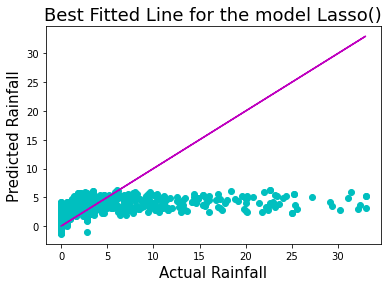

In [81]:
model(ls,x,y)

Training Accuracy of model Ridge() is -0.8058382246577025
Testing Accuracy of model Ridge() is -1.0601288058377483

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 2.256152841498701
The Mean Squared Error is (MSE) 16.079280209128058
The Root Mean Squared Error is (RMSE) 4.009897780383941


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge() is 35.06390462683567 & std is 0.0023560687501666955


At K-Fold 3 the CV Score of model Ridge() is 34.80053835023411 & std is 0.011774769799368614


At K-Fold 4 the CV Score of model Ridge() is 34.89409559594011 & std is 0.020892594475384503



	


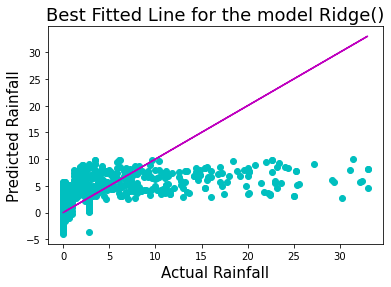

In [82]:
model(rd,x,y)

Training Accuracy of model ElasticNet() is -4.475772111053627
Testing Accuracy of model ElasticNet() is -5.287732590687438

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 2.189706101056952
The Mean Squared Error is (MSE) 18.133936313830848
The Root Mean Squared Error is (RMSE) 4.25839597898444


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet() is 28.446396058986632 & std is 0.003809878047955295


At K-Fold 3 the CV Score of model ElasticNet() is 28.3190745136991 & std is 0.016960025080879994


At K-Fold 4 the CV Score of model ElasticNet() is 28.05847868654931 & std is 0.03372960927321362



	


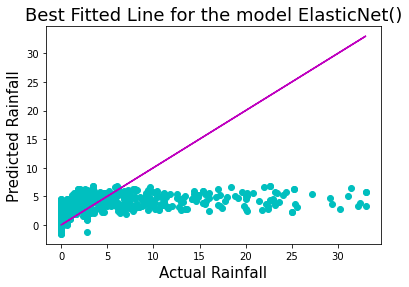

In [83]:
model(en,x,y)

Training Accuracy of model SGDRegressor() is -0.7650169882020652
Testing Accuracy of model SGDRegressor() is -1.015247148656619

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 2.266247882421976
The Mean Squared Error is (MSE) 16.123762925015924
The Root Mean Squared Error is (RMSE) 4.01544056424895


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor() is 34.92765764634908 & std is 0.0030049296098321743


At K-Fold 3 the CV Score of model SGDRegressor() is 34.57758712138823 & std is 0.012583023624508465


At K-Fold 4 the CV Score of model SGDRegressor() is 34.44720081810277 & std is 0.021215376769141477



	


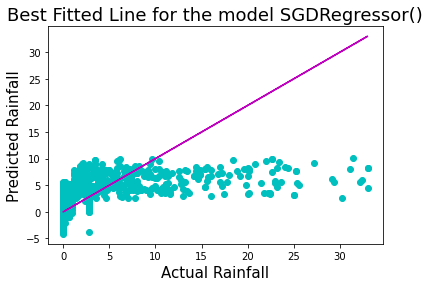

In [84]:
model(sgd,x,y)

Training Accuracy of model RandomForestRegressor() is 0.9052024656877944
Testing Accuracy of model RandomForestRegressor() is 0.0743103678519571

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 1.3487690376318278
The Mean Squared Error is (MSE) 11.055145678306904
The Root Mean Squared Error is (RMSE) 3.3249279207686446


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor() is 32.859640306543646 & std is 0.027271369341302698


At K-Fold 3 the CV Score of model RandomForestRegressor() is 39.76661412766334 & std is 0.06281621004884443


At K-Fold 4 the CV Score of model RandomForestRegressor() is 35.65954314895894 & std is 0.021087254349838658



	


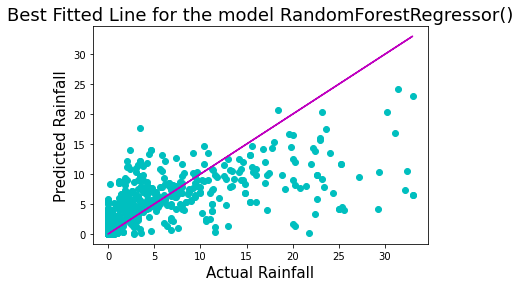

In [85]:
model(rf,x,y)


Training Accuracy of model AdaBoostRegressor() is -0.1607170299560774
Testing Accuracy of model AdaBoostRegressor() is -0.31491749862062735

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 2.3152585781825072
The Mean Squared Error is (MSE) 16.749129689195343
The Root Mean Squared Error is (RMSE) 4.09257005916763


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is 13.866009315419841 & std is 0.0712367264938441


At K-Fold 3 the CV Score of model AdaBoostRegressor() is 16.94150172154957 & std is 0.09108017232512276


At K-Fold 4 the CV Score of model AdaBoostRegressor() is -0.3513792817700062 & std is 0.2852791929046234



	


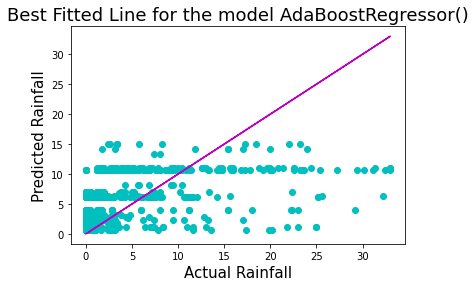

In [86]:
model(ad,x,y)

Training Accuracy of model GradientBoostingRegressor() is -0.013565911151087517
Testing Accuracy of model GradientBoostingRegressor() is -0.6105892207394732

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 1.7114623162034361
The Mean Squared Error is (MSE) 14.596246366864094
The Root Mean Squared Error is (RMSE) 3.8205034179887987


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor() is 17.512622288956308 & std is 0.19223815622893697


At K-Fold 3 the CV Score of model GradientBoostingRegressor() is 38.24133736678797 & std is 0.021580751785338904


At K-Fold 4 the CV Score of model GradientBoostingRegressor() is 35.790824968804934 & std is 0.06166839688562061



	


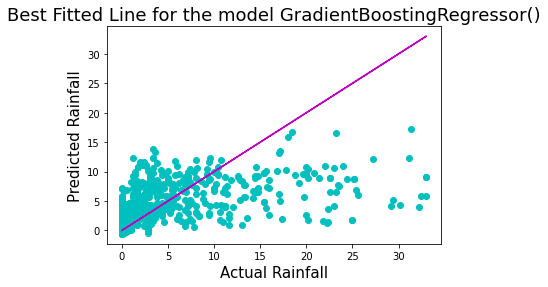

In [87]:
model(grd,x,y)

Hyper Parameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
dict_ls={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rd={'alpha':[.0001,.001,.01,.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
dict_en={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rf={'criterion' : ["squared_error", "absolute_error", "poisson"],'max_features':["sqrt", "log2", None]}
dict_ad={'loss':['linear', 'square', 'exponential']}
dict_grd={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}
dict_sgd={'alpha':[.0001,.001,.01,.1,1,10],'penalty':['l2', 'l1', 'elasticnet'],'learning_rate':['constant', 'optimal', 'invscaling','adaptive'],'loss':['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive']}


In [90]:
def HPT(machine,dictionary):
    grd=GridSearchCV(machine,dictionary)
    grd.fit(x,y)
    print(f'The best Parameters of the model {machine} are {grd.best_params_}')

In [91]:
HPT(ls,dict_ls)

The best Parameters of the model Lasso() are {'alpha': 0.01, 'selection': 'random'}


In [92]:
HPT(rd,dict_rd)

The best Parameters of the model Ridge() are {'alpha': 1, 'solver': 'saga'}


In [93]:
HPT(en,dict_en)

The best Parameters of the model ElasticNet() are {'alpha': 0.1, 'selection': 'random'}


In [94]:
HPT(sgd,dict_sgd)

The best Parameters of the model SGDRegressor() are {'alpha': 0.0001, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'penalty': 'l1'}


In [95]:
HPT(ad,dict_ad)

The best Parameters of the model AdaBoostRegressor() are {'loss': 'linear'}


In [96]:
HPT(grd,dict_grd)

The best Parameters of the model GradientBoostingRegressor() are {'criterion': 'mse', 'loss': 'squared_error', 'max_features': 'log2'}


In [98]:
#Redefining the models after getting the parameters
ls=Lasso(alpha=0.01,selection='random')
rd=Ridge(alpha=0.0001,solver='saga')
en=ElasticNet(alpha=0.1,selection='random')
rf=RandomForestRegressor(criterion='poisson',max_features='sqrt')
ad=AdaBoostRegressor(loss='linear')
grd=GradientBoostingRegressor(criterion='friedman_mse',loss='squared_error',max_features='sqrt')
sgd=SGDRegressor(alpha=0.01,learning_rate='optimal',penalty='l2',loss='squared_error')

Training Accuracy of model LinearRegression() is -0.805489050658253
Testing Accuracy of model LinearRegression() is -1.0597214052832653

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 2.256228822805347
The Mean Squared Error is (MSE) 16.079139279675392
The Root Mean Squared Error is (RMSE) 4.009880207646532


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model LinearRegression() is 35.06325706919522 & std is 0.002355190373578786


At K-Fold 3 the CV Score of model LinearRegression() is 34.80028842242522 & std is 0.011770766197784409


At K-Fold 4 the CV Score of model LinearRegression() is 34.89398168408585 & std is 0.020886726627205702



	


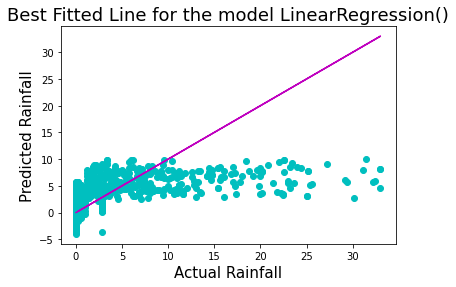

In [99]:
model(lr,x,y)

Training Accuracy of model Lasso(alpha=0.01, selection='random') is -0.8242430949444444
Testing Accuracy of model Lasso(alpha=0.01, selection='random') is -1.0818257056472502

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 2.2523370776300116
The Mean Squared Error is (MSE) 16.08591541249556
The Root Mean Squared Error is (RMSE) 4.010725048229505


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso(alpha=0.01, selection='random') is 35.09590275587469 & std is 0.002565312257767405


At K-Fold 3 the CV Score of model Lasso(alpha=0.01, selection='random') is 34.80716971800562 & std is 0.011924565977251632


At K-Fold 4 the CV Score of model Lasso(alpha=0.01, selection='random') is 34.89443266921044 & std is 0.021161367914861083



	


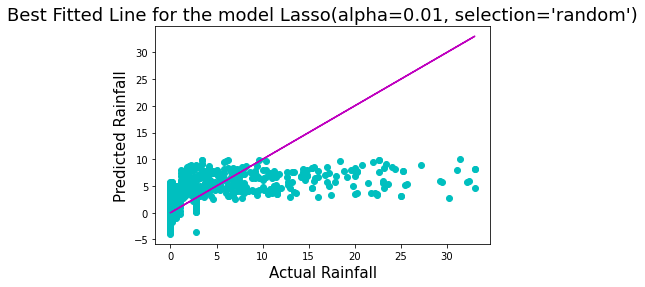

In [100]:
model(ls,x,y)

Training Accuracy of model Ridge(alpha=0.0001, solver='saga') is -0.8046121688225831
Testing Accuracy of model Ridge(alpha=0.0001, solver='saga') is -1.0586746071534114

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 2.2564003456390607
The Mean Squared Error is (MSE) 16.078954822486
The Root Mean Squared Error is (RMSE) 4.009857207243919


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge(alpha=0.0001, solver='saga') is 35.06513331529678 & std is 0.0023630031527858697


At K-Fold 3 the CV Score of model Ridge(alpha=0.0001, solver='saga') is 34.799347281931524 & std is 0.01174988492236921


At K-Fold 4 the CV Score of model Ridge(alpha=0.0001, solver='saga') is 34.895728044729665 & std is 0.020864752810547442



	


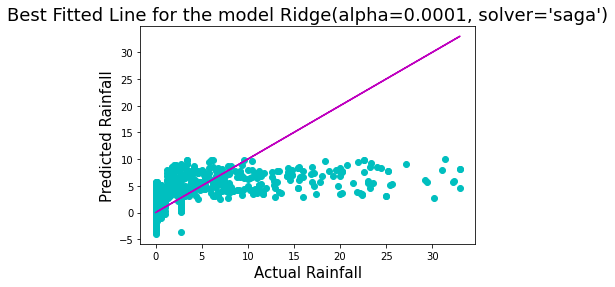

In [101]:
model(rd,x,y)

Training Accuracy of model ElasticNet(alpha=0.1, selection='random') is -1.0226136988642671
Testing Accuracy of model ElasticNet(alpha=0.1, selection='random') is -1.3136341229662256

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 2.2173474304332594
The Mean Squared Error is (MSE) 16.180590544191915
The Root Mean Squared Error is (RMSE) 4.0225104778225145


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 35.1651255777444 & std is 0.00325264666135755


At K-Fold 3 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 34.76669907751127 & std is 0.01341328306455621


At K-Fold 4 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 34.79738279063784 & std is 0.023840290673231134



	


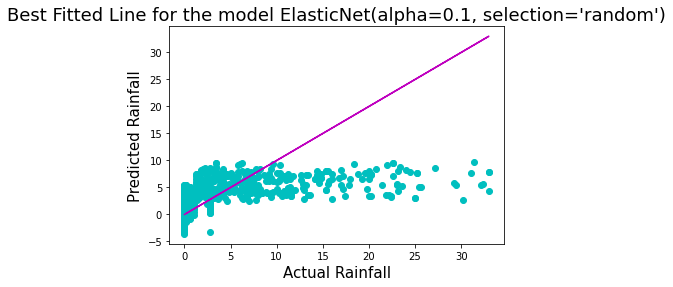

In [102]:
model(en,x,y)

Training Accuracy of model SGDRegressor(alpha=0.01, learning_rate='optimal') is -1.0631234690479174
Testing Accuracy of model SGDRegressor(alpha=0.01, learning_rate='optimal') is -1.3767750119061515

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 2.224833796800438
The Mean Squared Error is (MSE) 16.212869075179004
The Root Mean Squared Error is (RMSE) 4.026520715851218


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is 35.05672520536833 & std is 0.004981844389643164


At K-Fold 3 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is 34.50554531141807 & std is 0.011816055759847581


At K-Fold 4 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is 34.68096533590605 & std is 0.02019455638139912



	


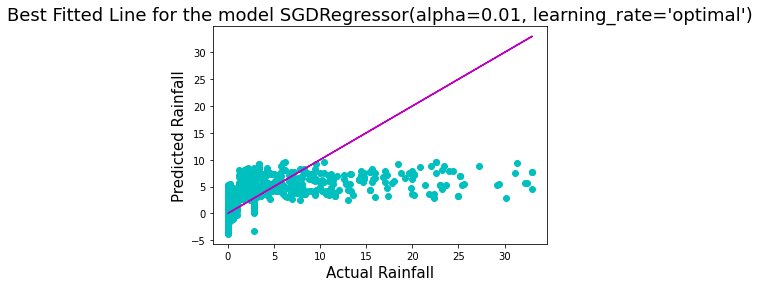

In [103]:
model(sgd,x,y)

Training Accuracy of model AdaBoostRegressor() is -0.0188998810219827
Testing Accuracy of model AdaBoostRegressor() is -0.15788949244010397

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 2.511320266246805
The Mean Squared Error is (MSE) 17.74677238410297
The Root Mean Squared Error is (RMSE) 4.212691821638864


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is 15.706796095931136 & std is 0.057639984727333504


At K-Fold 3 the CV Score of model AdaBoostRegressor() is 18.853604161642178 & std is 0.09259013896051065


At K-Fold 4 the CV Score of model AdaBoostRegressor() is 9.131415620806541 & std is 0.0926086853208705



	


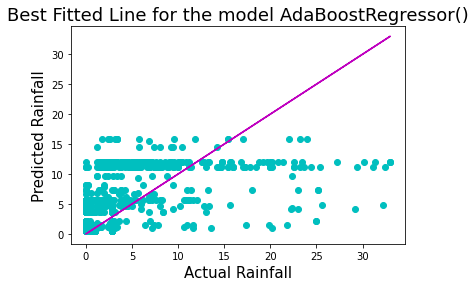

In [104]:
model(ad,x,y)

Training Accuracy of model GradientBoostingRegressor(max_features='sqrt') is -0.08233000558851766
Testing Accuracy of model GradientBoostingRegressor(max_features='sqrt') is -0.6431750261175697

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 1.749189973631414
The Mean Squared Error is (MSE) 14.653022294354797
The Root Mean Squared Error is (RMSE) 3.8279266312659126


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor(max_features='sqrt') is 17.532477469220936 & std is 0.19602118823444786


At K-Fold 3 the CV Score of model GradientBoostingRegressor(max_features='sqrt') is 38.45169795687966 & std is 0.02152694026524923


At K-Fold 4 the CV Score of model GradientBoostingRegressor(max_features='sqrt') is 36.564087193173414 & std is 0.05091253774072296



	


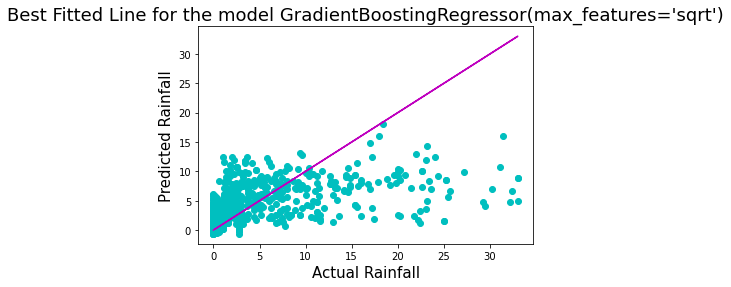

In [105]:
model(grd,x,y)

Training Accuracy of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 0.8067209513414237
Testing Accuracy of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is -0.23173179912579123

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 1.6877239316049668
The Mean Squared Error is (MSE) 13.288579088047646
The Root Mean Squared Error is (RMSE) 3.6453503381770656


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is -7.515815577326696 & std is 0.37861800957631325


At K-Fold 3 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 29.15412075932659 & std is 0.05259353959303448


At K-Fold 4 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 25.49518374662557 & std is 0.09297081475825497



	


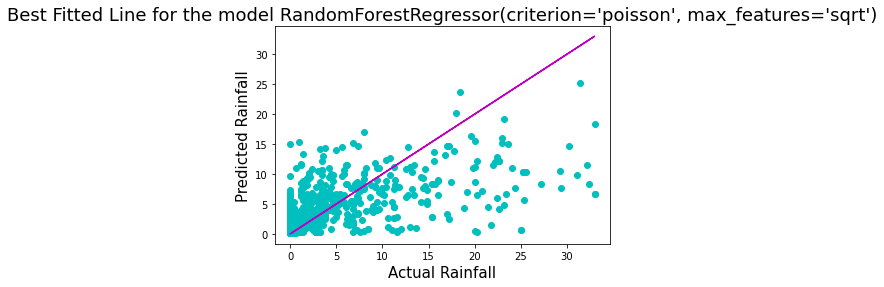

In [106]:
model(rf,x,y)

Saving the best model

In [107]:
import joblib
file='rainfall_regrsn.obj'
joblib.dump(rf,file)

['rainfall_regrsn.obj']

In [108]:
a=joblib.load('rainfall_regrsn.obj')
a

RandomForestRegressor(criterion='poisson', max_features='sqrt')

In [109]:
pred=a.predict(x_test)
pred

array([ 0.3887032 ,  3.99127597, 12.63574762, ...,  1.24127671,
        0.13593501,  0.29779278])

In [110]:
accuracy_score=r2_score(pred,y_test)
accuracy_score

0.5973859834337214

<AxesSubplot:ylabel='Density'>

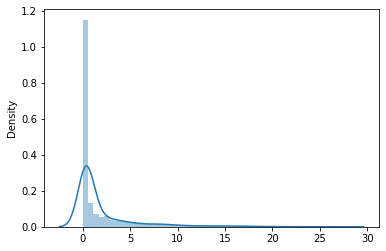

In [111]:
sns.distplot(pred)


Text(0.5, 1.0, 'Best Fitted Line of the Model')

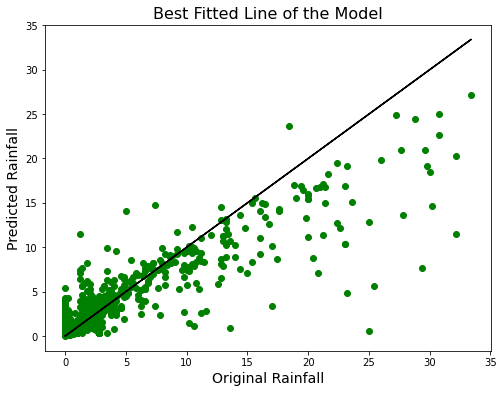

In [112]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='GREEN')
plt.plot(y_test,y_test,color='black')
plt.xlabel('Original Rainfall',fontsize=14)
plt.ylabel('Predicted Rainfall',fontsize=14)
plt.title('Best Fitted Line of the Model',fontsize=16)

In [113]:
conclusion=pd.DataFrame(data=([pred,y_test]),index=['Predicted Rainfall','Original Rainfall'])
conclusion

0         1          2        3         4     \
Predicted Rainfall  0.388703  3.991276  12.635748  17.0116  0.381953   
Original Rainfall   0.000000  1.200000  16.800000  18.8000  2.805913   

                        5      6         7         8         9     ...  \
Predicted Rainfall  0.522424  8.238  0.306773  0.306773  0.305358  ...   
Original Rainfall   0.200000  8.000  0.000000  0.000000  1.000000  ...   

                        1588      1589      1590      1591      1592  \
Predicted Rainfall  0.303972  3.555316  4.378909  4.900167  0.270051   
Original Rainfall   0.000000  1.600000  4.200000  3.800000  0.200000   

                        1593      1594      1595      1596      1597  
Predicted Rainfall  0.420674  0.292226  1.241277  0.135935  0.297793  
Original Rainfall   0.200000  0.000000  0.000000  0.000000  0.000000  

[2 rows x 1598 columns]

When I deployed our RandomForestRegressor model to the y_test data what i found is that the testing accuracy of the model went to 73% which is excellent accuracy for predicting any target variable correctly.As,we can see that the distance b/w the datapoints of the predicted rainfall and original rainfall is not that high which indicates RMSE to be on lower side.which indicates that our model is performing well

#### Classification Model Building(Taking Rain_Tomorrow as Target)
I've already done the EDA process in the first part hence will start by checking Correlation,outliers,skewness and all and later on will built a classification model

###### Correlation

In [114]:
df

Date  Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0         1     13.4  22.900000       0.6     5.389395  7.632205   
1        1         1      7.4  25.100000       0.0     5.389395  7.632205   
2        2         1     12.9  25.700000       0.0     5.389395  7.632205   
3        3         1      9.2  28.000000       0.0     5.389395  7.632205   
4        4         1     17.5  32.300000       1.0     5.389395  7.632205   
...    ...       ...      ...        ...       ...          ...       ...   
8420  2999         9      2.8  23.400000       0.0     5.389395  7.632205   
8421  3000         9      3.6  25.300000       0.0     5.389395  7.632205   
8422  3001         9      5.4  26.900000       0.0     5.389395  7.632205   
8423  3002         9      7.8  27.000000       0.0     5.389395  7.632205   
8424  3003         9     14.9  23.859976       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0              13      44.000000          13  ...         71.0         22.0   
1              14      44.000000           6  ...         44.0         25.0   
2              15      46.000000          13  ...         38.0         30.0   
3               4      24.000000           9  ...         45.0         16.0   
4              13      41.000000           1  ...         82.0         33.0   
...           ...            ...         ...  ...          ...          ...   
8420            0      31.000000           9  ...         51.0         24.0   
8421            6      22.000000           9  ...         56.0         21.0   
8422            3      37.000000           9  ...         53.0         24.0   
8423            9      28.000000          10  ...         51.0         24.0   
8424            3      40.174469           2  ...         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1  8.000000  4.503183     16.9     21.8   
1          1010.6       1007.8  4.566622  4.503183     17.2     24.3   
2          1007.6       1008.7  4.566622  2.000000     21.0     23.2   
3          1017.6       1012.8  4.566622  4.503183     18.1     26.5   
4          1010.8       1006.0  7.000000  8.000000     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3  4.566622  4.503183     10.1     22.4   
8421       1023.5       1019.1  4.566622  4.503183     10.9     24.5   
8422       1021.0       1016.8  4.566622  4.503183     12.5     26.1   
8423       1019.4       1016.5  3.000000  2.000000     15.1     26.0   
8424       1020.2       1017.9  8.000000  8.000000     15.0     20.9   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             0  

[8425 rows x 23 columns]

In [115]:
df.corr()['RainTomorrow'].sort_values()

Sunshine        -0.327731
Temp3pm         -0.193805
Pressure9am     -0.163985
MaxTemp         -0.152886
Pressure3pm     -0.135242
Evaporation     -0.059012
Temp9am         -0.023211
Date            -0.011228
Location         0.002824
WindDir3pm       0.008918
WindDir9am       0.032860
WindGustDir      0.051832
WindSpeed3pm     0.053568
WindSpeed9am     0.068285
MinTemp          0.092942
WindGustSpeed    0.190127
Rainfall         0.220021
Humidity9am      0.271222
Cloud9am         0.278943
RainToday        0.312929
Cloud3pm         0.344369
Humidity3pm      0.444808
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

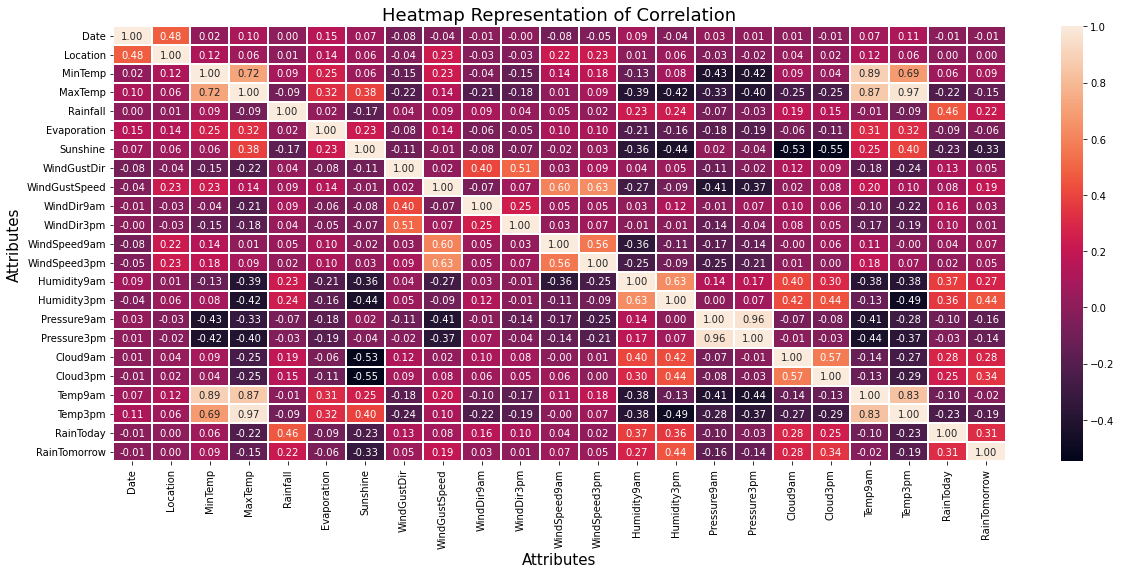

In [116]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.2,linecolor='white',fmt='0.2f')
plt.xlabel('Attributes',fontsize=15)
plt.ylabel('Attributes',fontsize=15)
plt.title('Heatmap Representation of Correlation',fontsize=18)
plt.show()

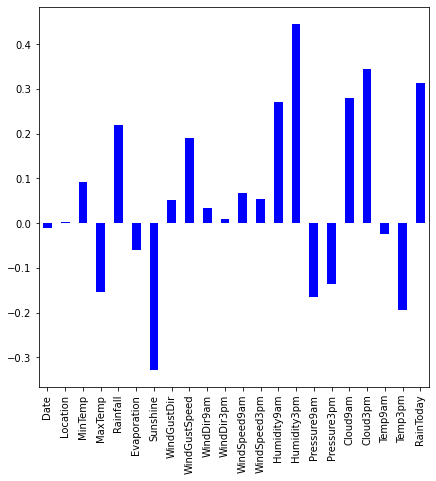

In [117]:
plt.figure(figsize=(7,7))
df.corr()['RainTomorrow'].drop(['RainTomorrow']).plot(kind='bar',color='blue')
plt.show()

Skewness

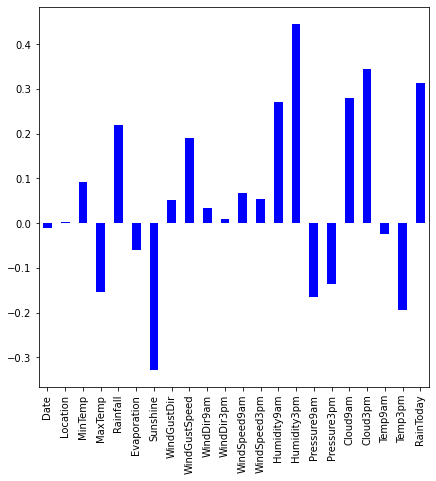

In [118]:
plt.figure(figsize=(7,7))
df.corr()['RainTomorrow'].drop(['RainTomorrow']).plot(kind='bar',color='blue')
plt.show()

In [119]:
z1=np.abs(zscore(df))
np.where(z1>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
         683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
         949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
        1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
        1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
        1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
        2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
        2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
        2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
        2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
        2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
        3059, 3060, 3066, 3067, 3067, 

#### Data Cleansing
Removing Multicollinearity

In [120]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
x=df.drop(['RainTomorrow'],axis=1)
x

Date  Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0         1     13.4  22.900000       0.6     5.389395  7.632205   
1        1         1      7.4  25.100000       0.0     5.389395  7.632205   
2        2         1     12.9  25.700000       0.0     5.389395  7.632205   
3        3         1      9.2  28.000000       0.0     5.389395  7.632205   
4        4         1     17.5  32.300000       1.0     5.389395  7.632205   
...    ...       ...      ...        ...       ...          ...       ...   
8420  2999         9      2.8  23.400000       0.0     5.389395  7.632205   
8421  3000         9      3.6  25.300000       0.0     5.389395  7.632205   
8422  3001         9      5.4  26.900000       0.0     5.389395  7.632205   
8423  3002         9      7.8  27.000000       0.0     5.389395  7.632205   
8424  3003         9     14.9  23.859976       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  ...  WindSpeed3pm  Humidity9am  \
0              13      44.000000          13  ...          24.0         71.0   
1              14      44.000000           6  ...          22.0         44.0   
2              15      46.000000          13  ...          26.0         38.0   
3               4      24.000000           9  ...           9.0         45.0   
4              13      41.000000           1  ...          20.0         82.0   
...           ...            ...         ...  ...           ...          ...   
8420            0      31.000000           9  ...          11.0         51.0   
8421            6      22.000000           9  ...           9.0         56.0   
8422            3      37.000000           9  ...           9.0         53.0   
8423            9      28.000000          10  ...           7.0         51.0   
8424            3      40.174469           2  ...          17.0         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1  8.000000  4.503183     16.9   
1            25.0       1010.6       1007.8  4.566622  4.503183     17.2   
2            30.0       1007.6       1008.7  4.566622  2.000000     21.0   
3            16.0       1017.6       1012.8  4.566622  4.503183     18.1   
4            33.0       1010.8       1006.0  7.000000  8.000000     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3  4.566622  4.503183     10.1   
8421         21.0       1023.5       1019.1  4.566622  4.503183     10.9   
8422         24.0       1021.0       1016.8  4.566622  4.503183     12.5   
8423         24.0       1019.4       1016.5  3.000000  2.000000     15.1   
8424         36.0       1020.2       1017.9  8.000000  8.000000     15.0   

      Temp3pm  RainToday  
0        21.8          0  
1        24.3          0  
2        23.2          0  
3        26.5          0  
4        29.7          0  
...       ...        ...  
8420     22.4          0  
8421     24.5          0  
8422     26.1          0  
8423     26.0          0  
8424     20.9          0  

[8425 rows x 22 columns]

In [122]:
def vif():
    df5=pd.DataFrame()
    df5['Features']=x.columns
    df5['Variance_Inflation_Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(df5)

In [123]:
vif()

         Features  Variance_Inflation_Factor
0            Date                   4.893556
1        Location                   6.641970
2         MinTemp                  58.043435
3         MaxTemp                 426.072409
4        Rainfall                   1.410755
5     Evaporation                   3.557236
6        Sunshine                  15.173789
7     WindGustDir                   5.304799
8   WindGustSpeed                  20.788671
9      WindDir9am                   4.726116
10     WindDir3pm                   6.024646
11   WindSpeed9am                   5.883336
12   WindSpeed3pm                   9.123542
13    Humidity9am                  69.463800
14    Humidity3pm                  48.838547
15    Pressure9am              515760.576978
16    Pressure3pm              514934.261955
17       Cloud9am                   8.705695
18       Cloud3pm                   8.807910
19        Temp9am                 189.650002
20        Temp3pm                 501.623457
21      Ra

Attributes (Pressure9am,Pressure3pm) & (Temp3pm,MaxTemp) are giving the same information to the target variable hence will drop those columns which have less correlation w.r.t. target variable

In [124]:
df6=df.drop(['Pressure9am','Temp3pm'],axis=1)
df6

Date  Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0         1     13.4  22.900000       0.6     5.389395  7.632205   
1        1         1      7.4  25.100000       0.0     5.389395  7.632205   
2        2         1     12.9  25.700000       0.0     5.389395  7.632205   
3        3         1      9.2  28.000000       0.0     5.389395  7.632205   
4        4         1     17.5  32.300000       1.0     5.389395  7.632205   
...    ...       ...      ...        ...       ...          ...       ...   
8420  2999         9      2.8  23.400000       0.0     5.389395  7.632205   
8421  3000         9      3.6  25.300000       0.0     5.389395  7.632205   
8422  3001         9      5.4  26.900000       0.0     5.389395  7.632205   
8423  3002         9      7.8  27.000000       0.0     5.389395  7.632205   
8424  3003         9     14.9  23.859976       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  ...  WindSpeed9am  WindSpeed3pm  \
0              13      44.000000          13  ...          20.0          24.0   
1              14      44.000000           6  ...           4.0          22.0   
2              15      46.000000          13  ...          19.0          26.0   
3               4      24.000000           9  ...          11.0           9.0   
4              13      41.000000           1  ...           7.0          20.0   
...           ...            ...         ...  ...           ...           ...   
8420            0      31.000000           9  ...          13.0          11.0   
8421            6      22.000000           9  ...          13.0           9.0   
8422            3      37.000000           9  ...           9.0           9.0   
8423            9      28.000000          10  ...          13.0           7.0   
8424            3      40.174469           2  ...          17.0          17.0   

      Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            71.0         22.0       1007.1  8.000000  4.503183     16.9   
1            44.0         25.0       1007.8  4.566622  4.503183     17.2   
2            38.0         30.0       1008.7  4.566622  2.000000     21.0   
3            45.0         16.0       1012.8  4.566622  4.503183     18.1   
4            82.0         33.0       1006.0  7.000000  8.000000     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         51.0         24.0       1020.3  4.566622  4.503183     10.1   
8421         56.0         21.0       1019.1  4.566622  4.503183     10.9   
8422         53.0         24.0       1016.8  4.566622  4.503183     12.5   
8423         51.0         24.0       1016.5  3.000000  2.000000     15.1   
8424         62.0         36.0       1017.9  8.000000  8.000000     15.0   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             0  

[8425 rows x 21 columns]

In [125]:
df7=df6[(z1<3).all(axis=1)]
df7

Date  Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0         1     13.4  22.900000       0.6     5.389395  7.632205   
1        1         1      7.4  25.100000       0.0     5.389395  7.632205   
2        2         1     12.9  25.700000       0.0     5.389395  7.632205   
3        3         1      9.2  28.000000       0.0     5.389395  7.632205   
4        4         1     17.5  32.300000       1.0     5.389395  7.632205   
...    ...       ...      ...        ...       ...          ...       ...   
8420  2999         9      2.8  23.400000       0.0     5.389395  7.632205   
8421  3000         9      3.6  25.300000       0.0     5.389395  7.632205   
8422  3001         9      5.4  26.900000       0.0     5.389395  7.632205   
8423  3002         9      7.8  27.000000       0.0     5.389395  7.632205   
8424  3003         9     14.9  23.859976       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  ...  WindSpeed9am  WindSpeed3pm  \
0              13      44.000000          13  ...          20.0          24.0   
1              14      44.000000           6  ...           4.0          22.0   
2              15      46.000000          13  ...          19.0          26.0   
3               4      24.000000           9  ...          11.0           9.0   
4              13      41.000000           1  ...           7.0          20.0   
...           ...            ...         ...  ...           ...           ...   
8420            0      31.000000           9  ...          13.0          11.0   
8421            6      22.000000           9  ...          13.0           9.0   
8422            3      37.000000           9  ...           9.0           9.0   
8423            9      28.000000          10  ...          13.0           7.0   
8424            3      40.174469           2  ...          17.0          17.0   

      Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            71.0         22.0       1007.1  8.000000  4.503183     16.9   
1            44.0         25.0       1007.8  4.566622  4.503183     17.2   
2            38.0         30.0       1008.7  4.566622  2.000000     21.0   
3            45.0         16.0       1012.8  4.566622  4.503183     18.1   
4            82.0         33.0       1006.0  7.000000  8.000000     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         51.0         24.0       1020.3  4.566622  4.503183     10.1   
8421         56.0         21.0       1019.1  4.566622  4.503183     10.9   
8422         53.0         24.0       1016.8  4.566622  4.503183     12.5   
8423         51.0         24.0       1016.5  3.000000  2.000000     15.1   
8424         62.0         36.0       1017.9  8.000000  8.000000     15.0   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             0  

[7987 rows x 21 columns]

In [126]:
print(df6.shape)
print(df7.shape)

(8425, 21)
(7987, 21)


In [127]:
percentage_loss=(8425-7987)*100/8425
percentage_loss

5.198813056379822

###### I'm getting the percentage loss is about 5% which is decent because our dataset is large having 8425 rows and out of it we are loosing only 5% rows.Now we can move ahead by considering it

#### Removing Skewness
PowerTransformer

In [128]:
x=df7.drop('RainTomorrow',axis=1)
x

Date  Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0         1     13.4  22.900000       0.6     5.389395  7.632205   
1        1         1      7.4  25.100000       0.0     5.389395  7.632205   
2        2         1     12.9  25.700000       0.0     5.389395  7.632205   
3        3         1      9.2  28.000000       0.0     5.389395  7.632205   
4        4         1     17.5  32.300000       1.0     5.389395  7.632205   
...    ...       ...      ...        ...       ...          ...       ...   
8420  2999         9      2.8  23.400000       0.0     5.389395  7.632205   
8421  3000         9      3.6  25.300000       0.0     5.389395  7.632205   
8422  3001         9      5.4  26.900000       0.0     5.389395  7.632205   
8423  3002         9      7.8  27.000000       0.0     5.389395  7.632205   
8424  3003         9     14.9  23.859976       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0              13      44.000000          13          14          20.0   
1              14      44.000000           6          15           4.0   
2              15      46.000000          13          15          19.0   
3               4      24.000000           9           0          11.0   
4              13      41.000000           1           7           7.0   
...           ...            ...         ...         ...           ...   
8420            0      31.000000           9           1          13.0   
8421            6      22.000000           9           3          13.0   
8422            3      37.000000           9          14           9.0   
8423            9      28.000000          10           3          13.0   
8424            3      40.174469           2           2          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  \
0             24.0         71.0         22.0       1007.1  8.000000  4.503183   
1             22.0         44.0         25.0       1007.8  4.566622  4.503183   
2             26.0         38.0         30.0       1008.7  4.566622  2.000000   
3              9.0         45.0         16.0       1012.8  4.566622  4.503183   
4             20.0         82.0         33.0       1006.0  7.000000  8.000000   
...            ...          ...          ...          ...       ...       ...   
8420          11.0         51.0         24.0       1020.3  4.566622  4.503183   
8421           9.0         56.0         21.0       1019.1  4.566622  4.503183   
8422           9.0         53.0         24.0       1016.8  4.566622  4.503183   
8423           7.0         51.0         24.0       1016.5  3.000000  2.000000   
8424          17.0         62.0         36.0       1017.9  8.000000  8.000000   

      Temp9am  RainToday  
0        16.9          0  
1        17.2          0  
2        21.0          0  
3        18.1          0  
4        17.8          0  
...       ...        ...  
8420     10.1          0  
8421     10.9          0  
8422     12.5          0  
8423     15.1          0  
8424     15.0          0  

[7987 rows x 20 columns]

In [129]:
pt=PowerTransformer(method='yeo-johnson')
x=pt.fit_transform(x)
x

array([[-2.47113848e+00, -1.56842088e+00,  6.05015740e-02, ...,
        -9.87238955e-04, -1.34269007e-01, -5.42475525e-01],
       [-2.44233565e+00, -1.56842088e+00, -1.05725282e+00, ...,
        -9.87238955e-04, -8.04446436e-02, -5.42475525e-01],
       [-2.42002633e+00, -1.56842088e+00, -3.22219600e-02, ...,
        -1.08215177e+00,  5.99608138e-01, -5.42475525e-01],
       ...,
       [ 1.66951372e+00,  1.01632853e+00, -1.43299533e+00, ...,
        -9.87238955e-04, -9.26387251e-01, -5.42475525e-01],
       [ 1.67023894e+00,  1.01632853e+00, -9.82333711e-01, ...,
        -1.08215177e+00, -4.57680773e-01, -5.42475525e-01],
       [ 1.67096405e+00,  1.01632853e+00,  3.38295674e-01, ...,
         1.55904423e+00, -4.75672549e-01, -5.42475525e-01]])

Standard Scaler

In [130]:
x=df7.drop('RainTomorrow',axis=1)
x

Date  Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0         1     13.4  22.900000       0.6     5.389395  7.632205   
1        1         1      7.4  25.100000       0.0     5.389395  7.632205   
2        2         1     12.9  25.700000       0.0     5.389395  7.632205   
3        3         1      9.2  28.000000       0.0     5.389395  7.632205   
4        4         1     17.5  32.300000       1.0     5.389395  7.632205   
...    ...       ...      ...        ...       ...          ...       ...   
8420  2999         9      2.8  23.400000       0.0     5.389395  7.632205   
8421  3000         9      3.6  25.300000       0.0     5.389395  7.632205   
8422  3001         9      5.4  26.900000       0.0     5.389395  7.632205   
8423  3002         9      7.8  27.000000       0.0     5.389395  7.632205   
8424  3003         9     14.9  23.859976       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0              13      44.000000          13          14          20.0   
1              14      44.000000           6          15           4.0   
2              15      46.000000          13          15          19.0   
3               4      24.000000           9           0          11.0   
4              13      41.000000           1           7           7.0   
...           ...            ...         ...         ...           ...   
8420            0      31.000000           9           1          13.0   
8421            6      22.000000           9           3          13.0   
8422            3      37.000000           9          14           9.0   
8423            9      28.000000          10           3          13.0   
8424            3      40.174469           2           2          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  \
0             24.0         71.0         22.0       1007.1  8.000000  4.503183   
1             22.0         44.0         25.0       1007.8  4.566622  4.503183   
2             26.0         38.0         30.0       1008.7  4.566622  2.000000   
3              9.0         45.0         16.0       1012.8  4.566622  4.503183   
4             20.0         82.0         33.0       1006.0  7.000000  8.000000   
...            ...          ...          ...          ...       ...       ...   
8420          11.0         51.0         24.0       1020.3  4.566622  4.503183   
8421           9.0         56.0         21.0       1019.1  4.566622  4.503183   
8422           9.0         53.0         24.0       1016.8  4.566622  4.503183   
8423           7.0         51.0         24.0       1016.5  3.000000  2.000000   
8424          17.0         62.0         36.0       1017.9  8.000000  8.000000   

      Temp9am  RainToday  
0        16.9          0  
1        17.2          0  
2        21.0          0  
3        18.1          0  
4        17.8          0  
...       ...        ...  
8420     10.1          0  
8421     10.9          0  
8422     12.5          0  
8423     15.1          0  
8424     15.0          0  

[7987 rows x 20 columns]

In [131]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.51886155, -1.50842735,  0.05644354, ...,  0.01313815,
        -0.13809939, -0.54247553],
       [-1.51768225, -1.50842735, -1.05847646, ...,  0.01313815,
        -0.08425401, -0.54247553],
       [-1.51650296, -1.50842735, -0.03646646, ..., -1.07666074,
         0.59778751, -0.54247553],
       ...,
       [ 2.02020726,  1.02942282, -1.43011646, ...,  0.01313815,
        -0.92783168, -0.54247553],
       [ 2.02138656,  1.02942282, -0.98414846, ..., -1.07666074,
        -0.46117169, -0.54247553],
       [ 2.02256586,  1.02942282,  0.33517354, ...,  1.5355312 ,
        -0.47912015, -0.54247553]])

1.1625607200341791e-15
1.0


AxesSubplot(0.125,0.125;0.775x0.755)


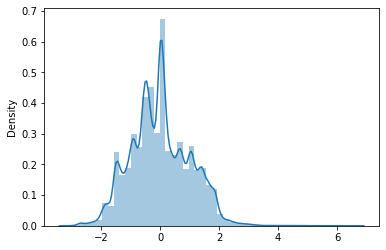

In [132]:
print(x.mean())
print(x.std())
print('\n')
print(sns.distplot(x))
plt.show()

In [133]:
y=df7['RainTomorrow']
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 7987, dtype: int32

PCA

In [134]:
pca=PCA(n_components=5)
x=pca.fit_transform(x)
x

array([[ 0.05120916,  0.59320956,  1.98959937, -2.38276388,  1.18114577],
       [ 0.61266798, -0.91739221,  1.87335704, -2.3860082 ,  1.17214948],
       [ 1.49621483, -0.01138805,  2.79016131, -2.90297211,  0.90362849],
       ...,
       [ 0.20565996, -1.60473057,  0.58773982,  1.13437238, -1.83930966],
       [ 0.88546954, -2.07834778,  0.1102082 ,  0.99553112, -1.86238719],
       [ 0.2734457 ,  0.3550253 , -1.00626736,  2.77347682, -0.07173214]])

Plotting the Relation between the Principle components

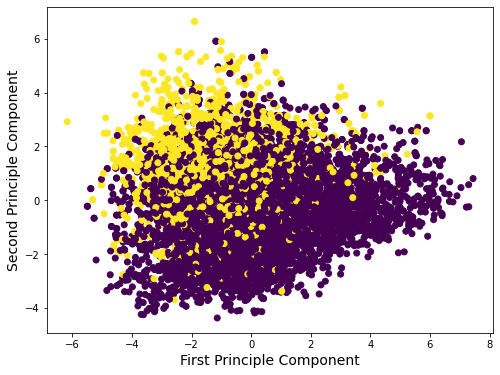

In [135]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0:1],x[:,1:2],c=y)
plt.xlabel('First Principle Component',fontsize=14)
plt.ylabel('Second Principle Component',fontsize=14)
plt.show()

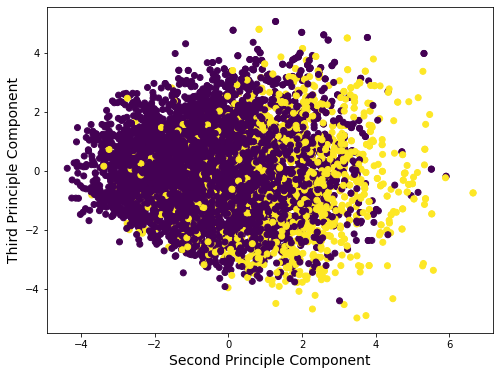

In [136]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,1],x[:,2],c=y)
plt.xlabel('Second Principle Component',fontsize=14)
plt.ylabel('Third Principle Component',fontsize=14)
plt.show()

###### IMBLearn Technique for balancing the Target class

In [137]:
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

In [138]:
import pandas
import numpy
print('sklearn version',sklearn.__version__)
print('numpy version',numpy.__version__)
print('pandas version',pandas.__version__)

sklearn version 1.0.2
numpy version 1.21.5
pandas version 1.4.2


In [139]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [140]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [141]:
y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

In [142]:
print(x.shape)
print(y.shape)

(12330, 5)
(12330,)


#### Training-Testing Phase
taking 20% for test and 80% for training

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr=LogisticRegression()

In [144]:
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    if accuracy_score(pred_train,y_train)==accuracy_score(pred_test,y_test):
        print(f'At random_state-{i} The Logistic Regression Model performs really well')
        print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
        print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
        print(f'Confusion Matrix for the model is\t {Confusion_matrix(pred_test,y_test)}')
        print(f'Classification Report for the model is\t {classification_report(pred_test,y_test)}')
        print('\n')
    else:
        print(f'At random_state-{i} The Training and Testing Accuracy of the model is different')
        print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
        print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
        print(f'Confusion Matrix for the model is\n {confusion_matrix(pred_test,y_test)}')
        print(f'Classification Report for the model is\n {classification_report(pred_test,y_test)}')
        print('\n') 

At random_state-0 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.7343876723438767
Testing accuracy of the model is	 0.7384428223844283
Confusion Matrix for the model is
 [[929 330]
 [315 892]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.75      0.74      0.74      1259
           1       0.73      0.74      0.73      1207

    accuracy                           0.74      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.74      0.74      0.74      2466



At random_state-1 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.7339821573398215
Testing accuracy of the model is	 0.7489862124898621
Confusion Matrix for the model is
 [[908 332]
 [287 939]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.76      0.73      0.75      1

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(f'At random_state-{0} The Training and Testing Accuracy of the model is almost same')
print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
print(f'Confusion Matrix for the model is\n {confusion_matrix(pred_test,y_test)}')
print(f'Classification Report for the model is\n {classification_report(pred_test,y_test)}')

At random_state-0 The Training and Testing Accuracy of the model is almost same
Training accuracy of the model is	 0.7343876723438767
Testing accuracy of the model is	 0.7384428223844283
Confusion Matrix for the model is
 [[929 330]
 [315 892]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.75      0.74      0.74      1259
           1       0.73      0.74      0.73      1207

    accuracy                           0.74      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.74      0.74      0.74      2466



Logistic Regression model performs well but since training accuracy is more than testing accuracy hence there would be overfitting and due to this Bias will be on lower side and variance would be on higher side,also will check the cv score for each model going forward.

Find out the CV Score

In [146]:
from sklearn.model_selection import cross_val_score

In [147]:
for i in range(2,4):
    cvs=cross_val_score(lr,x,y,cv=i)
    mean=cvs.mean()
    std=cvs.std()
    print(f'At K-Fold {i} the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 2 the CV Score of the logistic model is 0.6981346309813463 and standard deviation is 0.005190592051905918

At K-Fold 3 the CV Score of the logistic model is 0.7090835360908354 and standard deviation is 0.06915066529157515



In [148]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve,roc_auc_score
gb=GaussianNB()
mb=MultinomialNB()
neighbor=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svm=SVC()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()
sgd=SGDClassifier()

In [171]:
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print(f'For model {algorithm}')
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    print('\n Classification Report-\n',classification_report(y_test,pred_test_y))
    print('\n Confusion Metrix-\n',confusion_matrix(y_test,pred_test_y))
    print('\n\nAUC_ROC CURVE')
    prob=algorithm.predict_proba(x_test)[:,1]
    FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
    plt.plot(FPR,TPR)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC_Curve for the model {algorithm}')
    plt.show()
    ROC_AUC_SCORE=roc_auc_score(y_test,pred_test_y)
    print('ROC AUC SCORE is-',ROC_AUC_SCORE)
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for l in range(2,4):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

For model LogisticRegression()
Training_Accuracy_Score= 0.7343876723438767
Testing_Accuracy_Score= 0.7384428223844283

 Classification Report-
               precision    recall  f1-score   support

           0       0.74      0.75      0.74      1244
           1       0.74      0.73      0.73      1222

    accuracy                           0.74      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.74      0.74      0.74      2466


 Confusion Metrix-
 [[929 315]
 [330 892]]


AUC_ROC CURVE


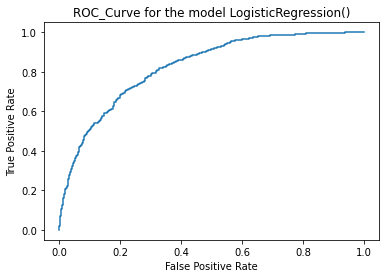

ROC AUC SCORE is- 0.7383677330400324


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.6981346309813463


At the K-Fold 3 the CV score of model LogisticRegression() is 0.7090835360908354




In [150]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.7298256285482563
Testing_Accuracy_Score= 0.7331711273317113

 Classification Report-
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1244
           1       0.74      0.72      0.73      1222

    accuracy                           0.73      2466
   macro avg       0.73      0.73      0.73      2466
weighted avg       0.73      0.73      0.73      2466


 Confusion Metrix-
 [[927 317]
 [341 881]]


AUC_ROC CURVE


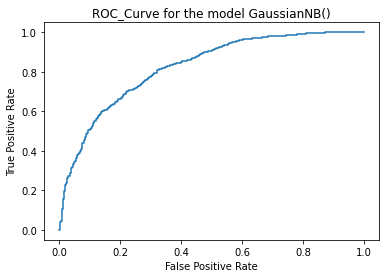

ROC AUC SCORE is- 0.7330630561885265


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.7062449310624492


At the K-Fold 3 the CV score of model GaussianNB() is 0.7084347120843472




In [151]:
model(gb,x,y)

For model KNeighborsClassifier()
Training_Accuracy_Score= 0.8942619626926196
Testing_Accuracy_Score= 0.8523925385239254

 Classification Report-
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1244
           1       0.80      0.94      0.86      1222

    accuracy                           0.85      2466
   macro avg       0.86      0.85      0.85      2466
weighted avg       0.86      0.85      0.85      2466


 Confusion Metrix-
 [[ 954  290]
 [  74 1148]]


AUC_ROC CURVE


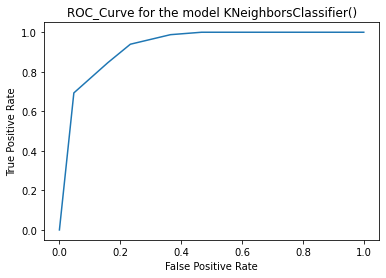

ROC AUC SCORE is- 0.8531622820635614


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.6739659367396593


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.7093268450932685




In [152]:
model(neighbor,x,y)

For model DecisionTreeClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.8588807785888077

 Classification Report-
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1244
           1       0.85      0.87      0.86      1222

    accuracy                           0.86      2466
   macro avg       0.86      0.86      0.86      2466
weighted avg       0.86      0.86      0.86      2466


 Confusion Metrix-
 [[1060  184]
 [ 164 1058]]


AUC_ROC CURVE


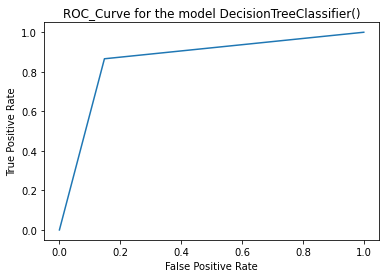

ROC AUC SCORE is- 0.8589419064208694


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.6785888077858881


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.7174371451743715




In [153]:
model(dtc,x,y)

For model AdaBoostClassifier()
Training_Accuracy_Score= 0.7451338199513382
Testing_Accuracy_Score= 0.7558799675587997

 Classification Report-
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      1244
           1       0.75      0.75      0.75      1222

    accuracy                           0.76      2466
   macro avg       0.76      0.76      0.76      2466
weighted avg       0.76      0.76      0.76      2466


 Confusion Metrix-
 [[946 298]
 [304 918]]


AUC_ROC CURVE


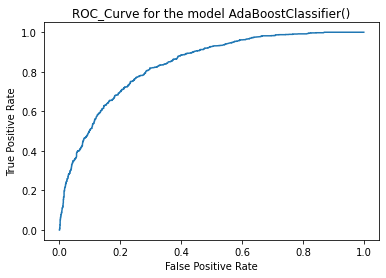

ROC AUC SCORE is- 0.7558388283400257


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.6693430656934307


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.6927007299270073




In [154]:
model(ad,x,y)

For model GradientBoostingClassifier()
Training_Accuracy_Score= 0.7723033252230332
Testing_Accuracy_Score= 0.7700729927007299

 Classification Report-
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1244
           1       0.77      0.77      0.77      1222

    accuracy                           0.77      2466
   macro avg       0.77      0.77      0.77      2466
weighted avg       0.77      0.77      0.77      2466


 Confusion Metrix-
 [[958 286]
 [281 941]]


AUC_ROC CURVE


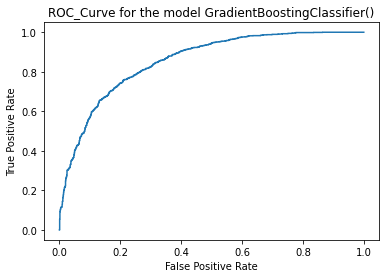

ROC AUC SCORE is- 0.7700727814294209


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.6590429845904298


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.6842660178426602




In [155]:
model(grd,x,y)

For model RandomForestClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.9055150040551501

 Classification Report-
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1244
           1       0.89      0.92      0.91      1222

    accuracy                           0.91      2466
   macro avg       0.91      0.91      0.91      2466
weighted avg       0.91      0.91      0.91      2466


 Confusion Metrix-
 [[1107  137]
 [  96 1126]]


AUC_ROC CURVE


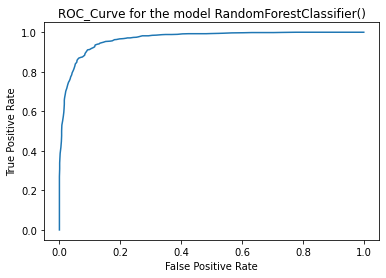

ROC AUC SCORE is- 0.9056558222512249


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier() is 0.7171938361719383


At the K-Fold 3 the CV score of model RandomForestClassifier() is 0.7602595296025955




In [156]:
model(rfc,x,y)

###### Hyper Parameter Tuning
To make the model more accurate by providing their best parameters

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
Parameter_neighbor={'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Parameter_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
Parameter_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None],'class_weight':["balanced", "balanced_subsample"]}
Parameter_ad={'algorithm':['SAMME', 'SAMME.R']}
Parameter_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}

In [159]:
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [160]:
HPT(neighbor,Parameter_neighbor)

The best Parameters of the model KNeighborsClassifier() is {'algorithm': 'auto', 'weights': 'distance'}


In [162]:
HPT(dtc,Parameter_dtc)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'}


In [163]:
HPT(ad,Parameter_ad)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME.R'}


In [165]:
lr=LogisticRegression()
gb=GaussianNB()
neighbor=KNeighborsClassifier(algorithm='auto',weights='distance')
dtc=DecisionTreeClassifier(criterion='log_loss',max_features='sqrt',splitter='random')
rfc=RandomForestClassifier(class_weight= 'balanced_subsample',criterion='entropy',max_features='sqrt')
ad=AdaBoostClassifier(algorithm= 'SAMME')
grd=GradientBoostingClassifier(criterion='squared_error',loss= 'exponential',max_features= 'log2')

For model LogisticRegression()
Training_Accuracy_Score= 0.7343876723438767
Testing_Accuracy_Score= 0.7384428223844283

 Classification Report-
               precision    recall  f1-score   support

           0       0.74      0.75      0.74      1244
           1       0.74      0.73      0.73      1222

    accuracy                           0.74      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.74      0.74      0.74      2466


 Confusion Metrix-
 [[929 315]
 [330 892]]


AUC_ROC CURVE


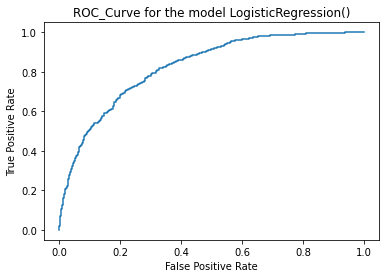

ROC AUC SCORE is- 0.7383677330400324


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.6981346309813463


At the K-Fold 3 the CV score of model LogisticRegression() is 0.7090835360908354




In [166]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.7298256285482563
Testing_Accuracy_Score= 0.7331711273317113

 Classification Report-
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1244
           1       0.74      0.72      0.73      1222

    accuracy                           0.73      2466
   macro avg       0.73      0.73      0.73      2466
weighted avg       0.73      0.73      0.73      2466


 Confusion Metrix-
 [[927 317]
 [341 881]]


AUC_ROC CURVE


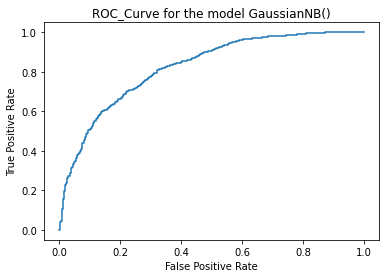

ROC AUC SCORE is- 0.7330630561885265


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.7062449310624492


At the K-Fold 3 the CV score of model GaussianNB() is 0.7084347120843472




In [167]:
model(gb,x,y)

For model KNeighborsClassifier(weights='distance')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.9059205190592052

 Classification Report-
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      1244
           1       0.86      0.97      0.91      1222

    accuracy                           0.91      2466
   macro avg       0.91      0.91      0.91      2466
weighted avg       0.91      0.91      0.91      2466


 Confusion Metrix-
 [[1047  197]
 [  35 1187]]


AUC_ROC CURVE


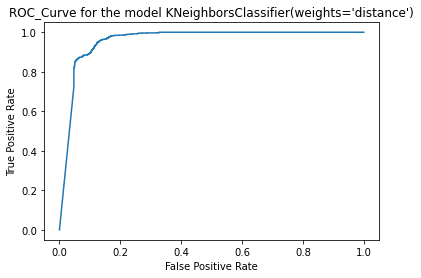

ROC AUC SCORE is- 0.9064991500939369


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier(weights='distance') is 0.7021086780210868


At the K-Fold 3 the CV score of model KNeighborsClassifier(weights='distance') is 0.7413625304136254




In [168]:
model(neighbor,x,y)

For model RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='sqrt')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.9083536090835361

 Classification Report-
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      1244
           1       0.89      0.93      0.91      1222

    accuracy                           0.91      2466
   macro avg       0.91      0.91      0.91      2466
weighted avg       0.91      0.91      0.91      2466


 Confusion Metrix-
 [[1108  136]
 [  90 1132]]


AUC_ROC CURVE


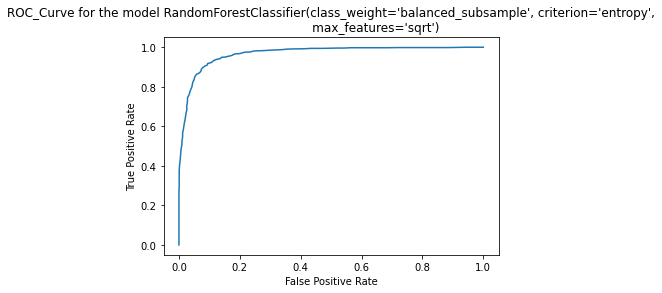

ROC AUC SCORE is- 0.908512743328369


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='sqrt') is 0.7190592051905921


At the K-Fold 3 the CV score of model RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='sqrt') is 0.7602595296025952




In [173]:
model(rfc,x,y)

For model AdaBoostClassifier(algorithm='SAMME')
Training_Accuracy_Score= 0.7340835360908353
Testing_Accuracy_Score= 0.7506082725060828

 Classification Report-
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1244
           1       0.76      0.73      0.74      1222

    accuracy                           0.75      2466
   macro avg       0.75      0.75      0.75      2466
weighted avg       0.75      0.75      0.75      2466


 Confusion Metrix-
 [[953 291]
 [324 898]]


AUC_ROC CURVE


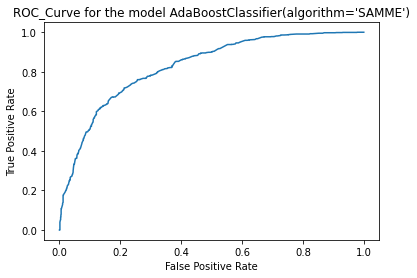

ROC AUC SCORE is- 0.7504690271075303


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.6890510948905109


At the K-Fold 3 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.7016220600162205




In [174]:
model(ad,x,y)

For model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='log2')
Training_Accuracy_Score= 0.7691605839416058
Testing_Accuracy_Score= 0.7656123276561233

 Classification Report-
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      1244
           1       0.76      0.77      0.76      1222

    accuracy                           0.77      2466
   macro avg       0.77      0.77      0.77      2466
weighted avg       0.77      0.77      0.77      2466


 Confusion Metrix-
 [[950 294]
 [284 938]]


AUC_ROC CURVE


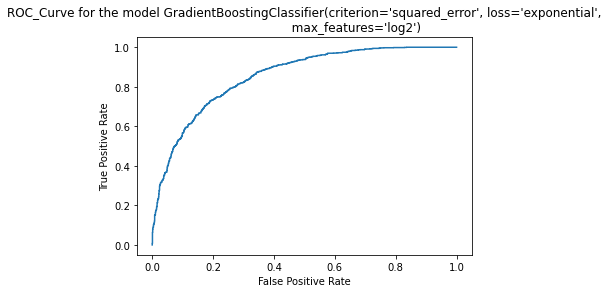

ROC AUC SCORE is- 0.7656298514374728


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='log2') is 0.6712084347120844


At the K-Fold 3 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='log2') is 0.6853203568532035




In [175]:
model(grd,x,y)

In [176]:
import joblib

In [178]:
File='Rain_tomorrow.obj'
joblib.dump(rfc,File)

['Rain_tomorrow.obj']

In [179]:
b=joblib.load('Rain_tomorrow.obj')
b

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='sqrt')

In [180]:
pred=b.predict(x_test)
pred

array([1, 1, 1, ..., 1, 1, 0])

In [181]:
Accuracy_score=(accuracy_score(pred,y_test))*100
Accuracy_score

90.8353609083536


The ROC AUC Score is= 0.908512743328369


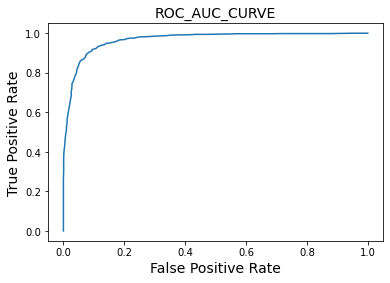

In [182]:
prob=b.predict_proba(x_test)[:,1]
FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC_CURVE',fontsize=14)
print(f'\nThe ROC AUC Score is= {roc_auc_score(y_test,pred)}')

In [183]:
conclusion=pd.DataFrame(data=([pred,y_test]),index=['Predicted RainTomorrow','Original RainTomorrow'])
conclusion


0     1     2     3     4     5     6     7     8     \
Predicted RainTomorrow     1     1     1     1     0     1     0     0     0   
Original RainTomorrow      1     1     1     1     0     1     0     0     0   

                        9     ...  2456  2457  2458  2459  2460  2461  2462  \
Predicted RainTomorrow     1  ...     1     1     0     1     1     1     1   
Original RainTomorrow      1  ...     1     1     0     1     1     1     1   

                        2463  2464  2465  
Predicted RainTomorrow     1     1     0  
Original RainTomorrow      1     1     0  

[2 rows x 2466 columns]

When I deployed our RandomForestClassifier model to the y_test data what i found is that the testing accuracy of the model went to 91% which is excellent accuracy for predicting any target variable correctly.Also the ROC AUC Score is 0.91 which is greater than 0.5 of threshold value and it indicates that out of 100 times,91 times model is predicting the right classes and it is still a great accuracy. As we can see in the conclusion portion we have got almost same value in prediction column as compare to original RainTomorrow column. So we can say that this model has great accuracy in predicting the income